# Homework Assignment 4 - [30 points]


In this analysis, we will perform two case studies.
<hr>


<hr>

## <u>Case Study 1</u>: Wheat Seed Analysis Continued

Suppose that you are biologist working for an agricultural company. Specifically, you would like to learn more about some of the biological properties of three types of wheat seeds: rosa wheat seeds and Canadian wheat seeds

The attached seeds_modified3.csv contains seven numerical attributes for 70 rosa seeds and 70 Canadian seeds. In this analysis we would like to answer the following research questions.

### <u>Research Questions</u>:

1. Does there exist a clustering structure in this dataset?
2. If so, what can we say about the clusters in the dataset?
3. Is this dataset an ideal dataset to use with k-means?
4. How do the rosa and Canadian seed labels associate with the underyling clustering structure in this dataset?
5. Is there any evidence of sub-types of seed classes in this dataset?
6. Is there any evidence of sub-clusters in this dataset?

### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, silhouette_samples, silhouette_score
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler
from sklearn_extra.cluster import KMedoids
from sklearn.manifold import TSNE

### 1. Data Reading and Preprocessing

#### 1.1. Reading dataset

Read the seeds_modified3.csv dataset into a dataframe. You can assume that this dataset has no missing values.

In [2]:
df = pd.read_csv('seeds_modified3.csv')
df.head()

area  perimeter  compactness  kernel_length  width  asymmetry_coefficient  \
0  17.62      15.98       0.8672          6.191  2.561                  4.076   
1  16.84      15.67       0.8622          5.998  2.484                  4.675   
2  17.26      15.72       0.8762          5.978  2.594                  4.529   
3  19.11      16.26       0.9081          6.154  2.920                  2.926   
4  16.82      15.51       0.8786          6.017  2.486                  4.004   

   kernel_groove_length seed_class  
0                 6.060       rosa  
1                 5.877       rosa  
2                 5.791       rosa  
3                 6.079       rosa  
4                 5.841       rosa

#### 1.2. Scale the dataset

Create a copy of your dataframe from 1.1 that is comprised of just the numerical variables. Then create a new dataframe (or overwrite this dataframe) that has scaled the numerical variables.

In [3]:
df1 = df.drop(['seed_class'], axis = 1)
scaled = StandardScaler().fit_transform(df1)
df1 = pd.DataFrame(scaled, columns = df1.columns)
df1.head()

area  perimeter  compactness  kernel_length     width  \
0  0.743795   0.889264     0.055299       1.017997 -0.487536   
1  0.517599   0.725592    -0.135293       0.638343 -0.759892   
2  0.639397   0.751990     0.398364       0.599001 -0.370813   
3  1.175888   1.037098     1.614339       0.945214  0.782276   
4  0.511800   0.641115     0.489848       0.675719 -0.752818   

   asymmetry_coefficient  kernel_groove_length  
0               0.063534              1.006811  
1               0.451646              0.640594  
2               0.357048              0.468492  
3              -0.681588              1.044833  
4               0.016883              0.568551

### 2. Pre-Cluster Analysis

#### 2.1.  t-SNE Plots

Using 6 different perplexity values and at least two random states for each perplexity value, map your **scaled** seeds dataset onto a two-dimensional dataset using the t-SNE algorithm. Show your projected coordinates in a scatterplot for each combination of random state and perplexity value. **In addition, for each of these scatterplots, you should color-code the points by the corresponding label in the seed_class column.**

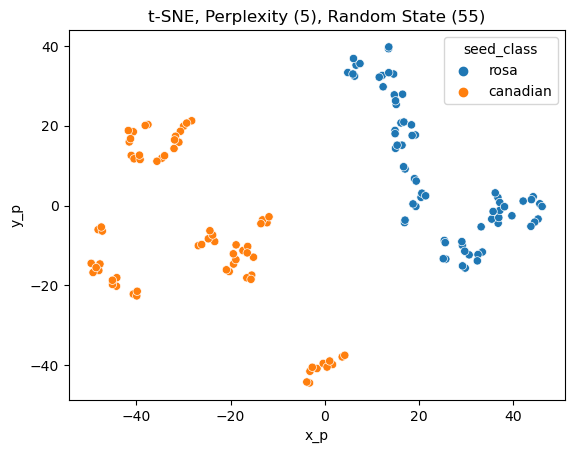

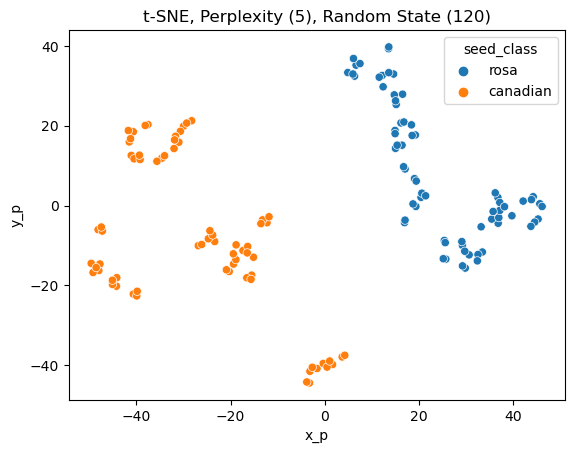

-\-\-\


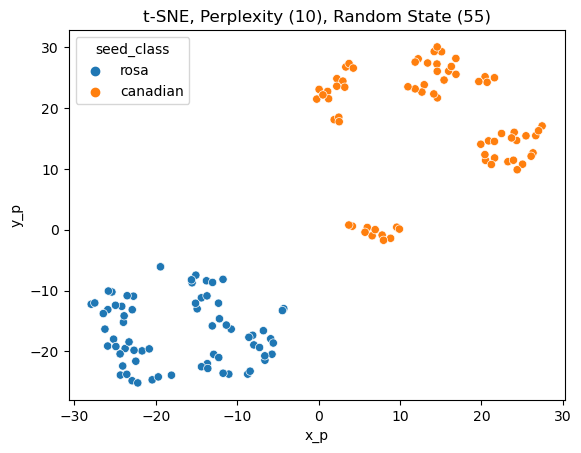

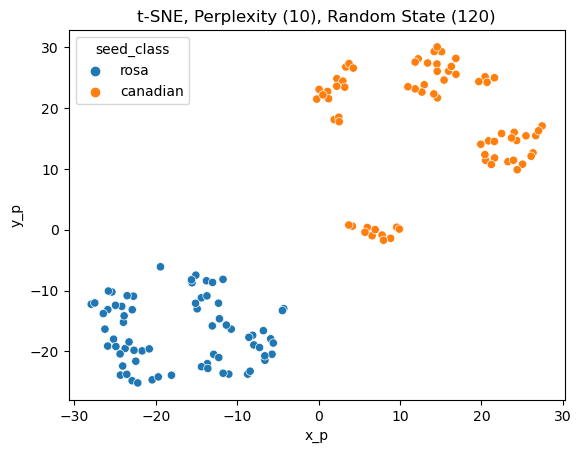

-\-\-\


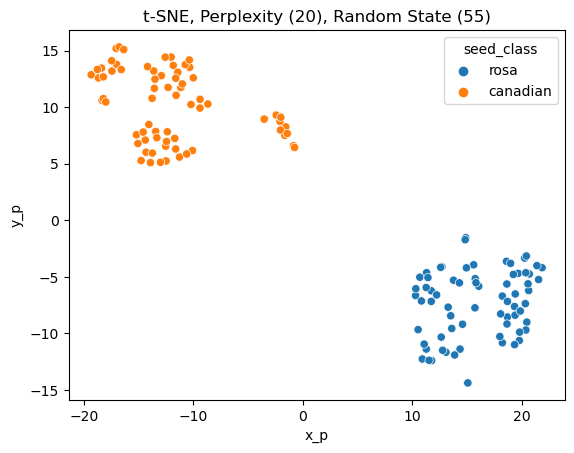

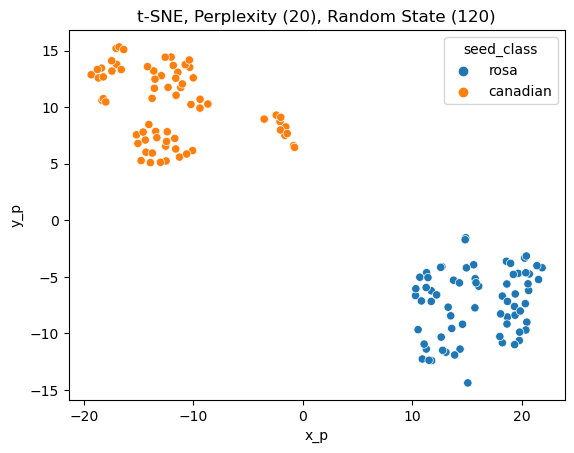

-\-\-\


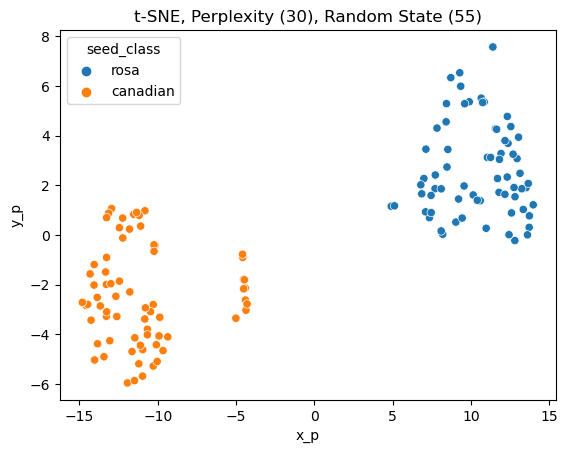

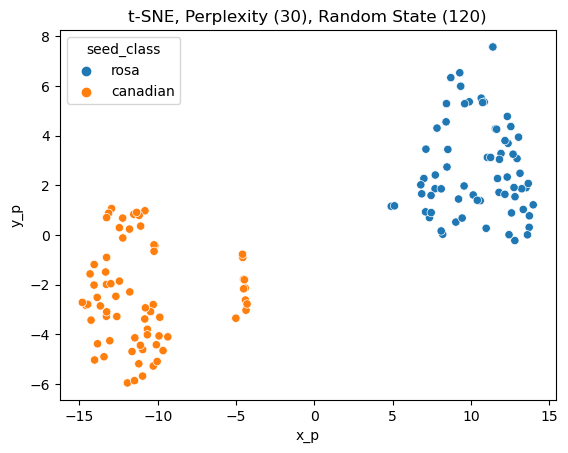

-\-\-\


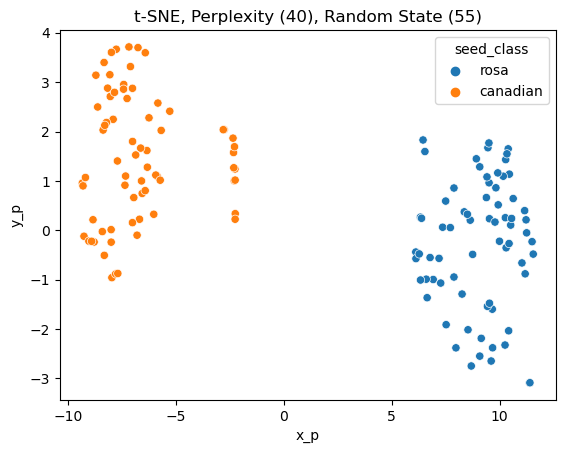

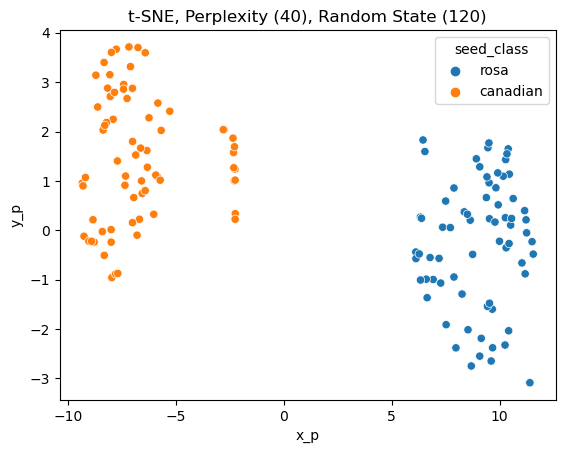

-\-\-\


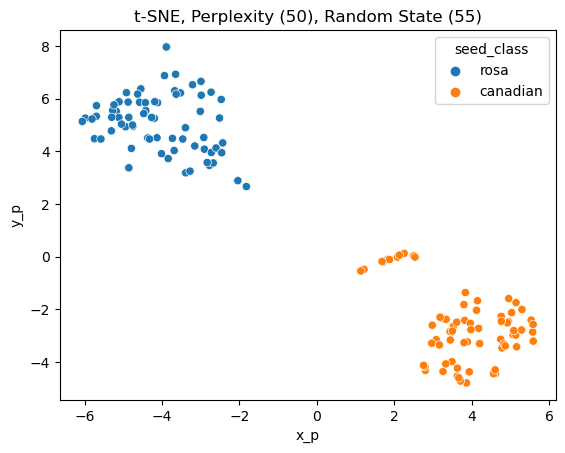

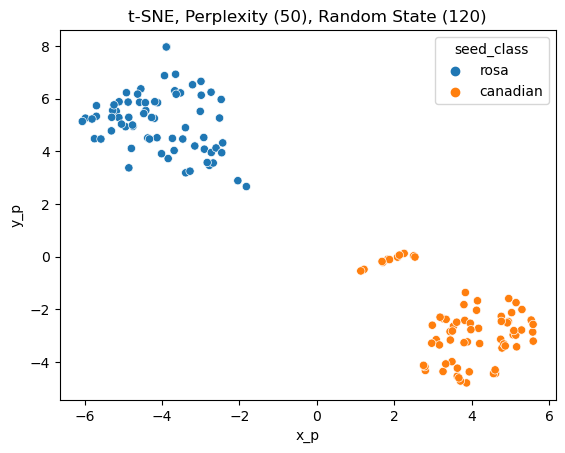

-\-\-\


In [4]:
for i in [5,10,20,30,40,50]:
    for k in [55, 120]:
        tsne = TSNE(n_components = 2, perplexity = i, random_state = k)
        datsne = tsne.fit_transform(df1)
        df_t = pd.DataFrame(datsne, columns = ['x_p', 'y_p'])
        df_c = pd.concat([df, df_t], axis = 1)
        sns.scatterplot(x = 'x_p', y = 'y_p', hue = 'seed_class', data = df_c)
        plt.title('t-SNE, Perplexity (%s), Random State (%s)' %(i,k))
        plt.show()
    print('-\\-\\-\\')
        

#### 2.2.  Use your t-SNE plots to answer the following questions.

* <u>2.2.1.</u> Do these plots suggest that the scaled dataset is clusterable? Explain.

Yes, the plots suggest that the data is clusterable, it is possible to observe the separation of diferent groups across different perplexity values


* <u>2.2.2.</u> How many clusters do these t-SNE plots suggest exist in the scaled dataset? Explain. (This answer is subjective. As long as your reasoning is accurate and explained, then you will get full credit).

By looking at the plots, I would say that there are 3 or 4 groups. There are two main groups that account to each one of the types of seeds. But It is also possible to observe that within the types of seeds there are possible subgroups. For example with a perplexity of 20, it is possible to observe 4 or more groups. As perplexity increases, the two groups that appear as separate for the Rosa seed class become one, but for the canadian one it is possible to still observe two different groups


* <u>2.2.3.</u> What do these t-SNE plots suggest about the shapes of the clusters in the scaled dataset? Explain. (This answer is subjective. As long as your reasoning is accurate and explained, then you will get full credit).

It is possible to observe that there are two spherical clusteres, but there's also a cluster with few observation that has a non-convex shape

* <u>2.2.4.</u> What do these t-SNe plots suggest about whether the clusters in the scaled dataset are well-separated? Explain. (This answer is subjective. As long as your reasoning is accurate and explained, then you will get full credit).

There is a clear separation of the clusters. The t-SNE plot shows proper distancing between clusters, therefore we can assumer that the clusters are well separated in the scaled dataset.

* <u>2.2.5.</u> Do these t-SNE plots suggest that the clusters in the scaled dataset roughly balanced in size? Explain. (This answer is subjective. As long as your reasoning is accurate and explained, then you will get full credit).

Assuming there are a total of 3 or 4 clusters, it is possible to observe that there's a cluster with very few observations compared to the other clusters. So the t-SNE plot shows that the distribution of observations is not even across clusters


#### 2.3. Pick one t-SNE plot.

Of the plots that you created above, pick a perplexity value and random state that best reflects what you suggested in your answers to the questions in 2.2 and show the corresponding t-SNE plot below.

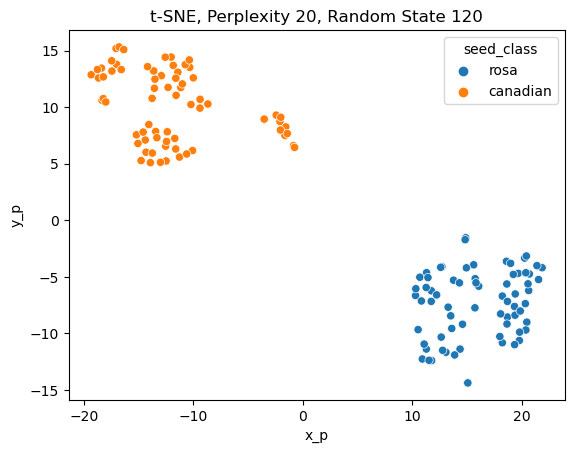

In [5]:
tsne = TSNE(n_components = 2, perplexity = 20, random_state = 120)
datsne = tsne.fit_transform(df1)
df_t = pd.DataFrame(datsne, columns = ['x_p', 'y_p'])
df_c = pd.concat([df, df_t], axis = 1)
sns.scatterplot(x = 'x_p', y = 'y_p', hue = 'seed_class', data = df_c)
plt.title('t-SNE, Perplexity 20, Random State 120')
plt.show()

#### 2.4. [1 pt] Underlying Clustering Structure and Seed Class Association

Is there a one-to-one correspondence between the two seed classes and the clusters suggested by the t-SNE algorithm? If not, describe the relationship.

Yes. Each cluster represents a single seed class and each seed class is grouped together

#### 2.5. Sub-types of Seed Classes

Do you think these plots suggest that there exist different sub-types of **seed classes** in this dataset? Explain. (This answer is subjective. As long as your reasoning is accurate and explained, then you will get full credit).


It could be possible to infere that there could be pottentially a subclasses of seeds for the canadian and rosa class. By looking at the tSNE plot at different perplexities, there are some possibly meaningful sub types of seeds. It is possible to observe how with very low perplexities, there are pottentially several easily differentiable groups of seeds.


#### 2.6. Sub-Clusters

Do you think these plots suggest that there may exist a set of "main clusters" in this dataset, and then that some of these "main clusters" may be comprised of smaller **"subclusters"**? Explain. (This answer is subjective. As long as your reasoning is accurate and explained, then you will get full credit).


Yes. It is possible to observe two main clusters delimited by each seed class, but for each cluster there are subclusters. For the rosa class we could assume that there are two different sub populations of rosa seed and for the canadian, we could assumer that there are either 2 well defined subclusters or even 4 subclusters.

### 3. k-Means Cluster Analysis - Using Elbow Plot Method for Parameter Tuning


#### 3.1. k-means Elbow Plot
Create a k-means elbow plot for your seeds dataset.

-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-


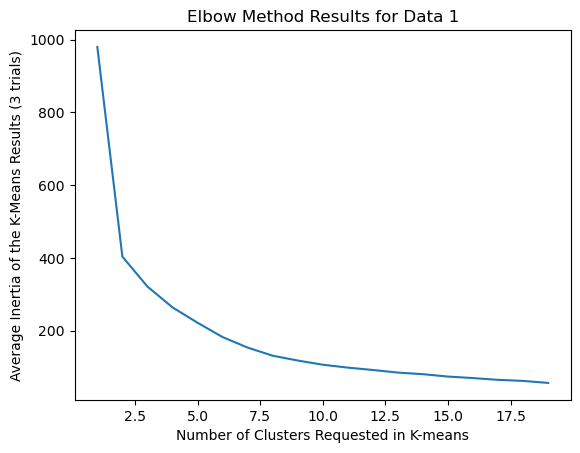

In [6]:
import warnings
warnings.filterwarnings("ignore")


avg_inertia_list=[]
for k in range(1,20):
    print('-')
    sub_inertia_list=[]
    for i in range(0,3):
        kmeans=KMeans(n_clusters=k).fit(df1)
        sub_inertia_list.append(kmeans.inertia_)
    avg_inertia_list.append(np.average(sub_inertia_list))

plt.plot(range(1,20),avg_inertia_list)
plt.xlabel('Number of Clusters Requested in K-means')
plt.ylabel('Average Inertia of the K-Means Results (3 trials)')
plt.title('Elbow Method Results for Data 1')
plt.show()

#### 3.2. k-means Clustering

Use the number of clusters suggestd by the k-means elbow plot to cluster the dataset with k-means.

In [7]:
kmeans = KMeans(n_clusters = 2, random_state = 100)
kmeans.fit(df1)

KMeans(n_clusters=2, random_state=100)

#### 3.3. t-SNE and k-means

Color code the points in your selected t-SNE plot with the k-means cluster labels from 3.2. 

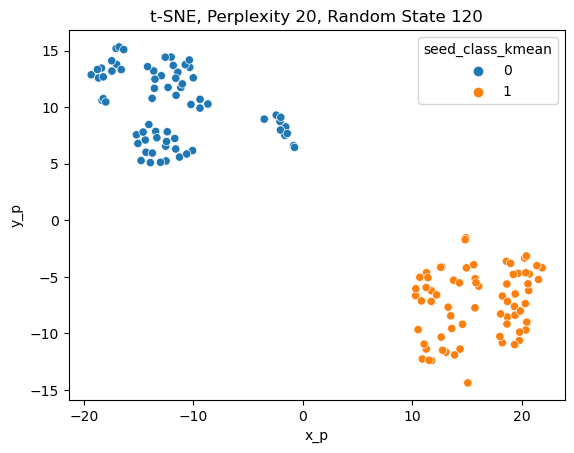

In [8]:
df['seed_class_kmean'] = kmeans.labels_

tsne = TSNE(n_components = 2, perplexity = 20, random_state = 120)
datsne = tsne.fit_transform(df1)
df_t = pd.DataFrame(datsne, columns = ['x_p', 'y_p'])
df_c = pd.concat([df, df_t], axis = 1)
sns.scatterplot(x = 'x_p', y = 'y_p', hue = 'seed_class_kmean', data = df_c)
plt.title('t-SNE, Perplexity 20, Random State 120')
plt.show()

#### 3.4. t-SNE vs. k-means

To what extent does the clustering suggested by k-means (using the elbow-plot method for k selection) agree with the clustering structure suggested by the t-SNE plot?

There is full agreement. 

### 4. k-Means Cluster Analysis - Using t-SNE plots for Parameter Tuning

#### 4.1. k-means Clustering

Use the total number of "subclusters" you detected in your t-SNE plots to select the number of clusters to ask k-means. Run k-means again with this new $k$ value. Use a random state of 100.

In [9]:
kmeans = KMeans(n_clusters = 4, random_state = 100)
kmeans.fit(df1)

KMeans(n_clusters=4, random_state=100)

#### 4.2.. t-SNE and k-means

Color code the points in your selected t-SNE plot with the k-means cluster labels from 3.2. 

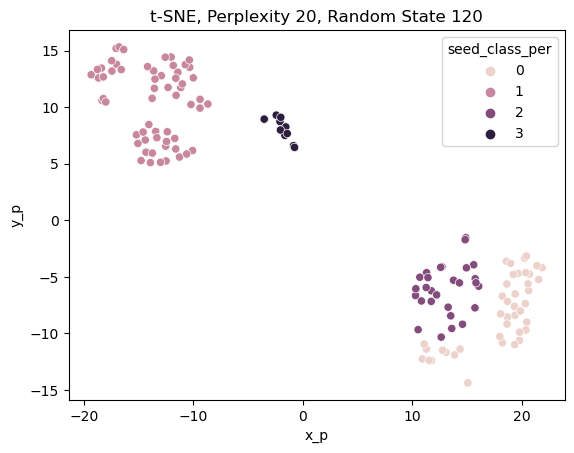

In [10]:
df['seed_class_per'] = kmeans.labels_

tsne = TSNE(n_components = 2, perplexity = 20, random_state = 120)
datsne = tsne.fit_transform(df1)
df_t = pd.DataFrame(datsne, columns = ['x_p', 'y_p'])
df_c = pd.concat([df, df_t], axis = 1)
sns.scatterplot(x = 'x_p', y = 'y_p', hue = 'seed_class_per', data = df_c)
plt.title('t-SNE, Perplexity 20, Random State 120')
plt.show()

#### 4.3. t-SNE vs. k-means

To what extent does the clustering suggested by k-means (using the t-SNE plot for k selection) agree with the clustering structure suggested by the t-SNE plot?

K Means is able to identify only 2 clusters of the ones I initially observed in tSNE (Upper left and lower right). 

#### 4.4. More Analysis

Plot each pair of attributes in your scaled dataset and color code the points by your k-mean cluster labels from 4.1.

In [11]:
df1['seed_class'] = kmeans.labels_
df1.head()

area  perimeter  compactness  kernel_length     width  \
0  0.743795   0.889264     0.055299       1.017997 -0.487536   
1  0.517599   0.725592    -0.135293       0.638343 -0.759892   
2  0.639397   0.751990     0.398364       0.599001 -0.370813   
3  1.175888   1.037098     1.614339       0.945214  0.782276   
4  0.511800   0.641115     0.489848       0.675719 -0.752818   

   asymmetry_coefficient  kernel_groove_length  seed_class  
0               0.063534              1.006811           2  
1               0.451646              0.640594           2  
2               0.357048              0.468492           2  
3              -0.681588              1.044833           0  
4               0.016883              0.568551           2

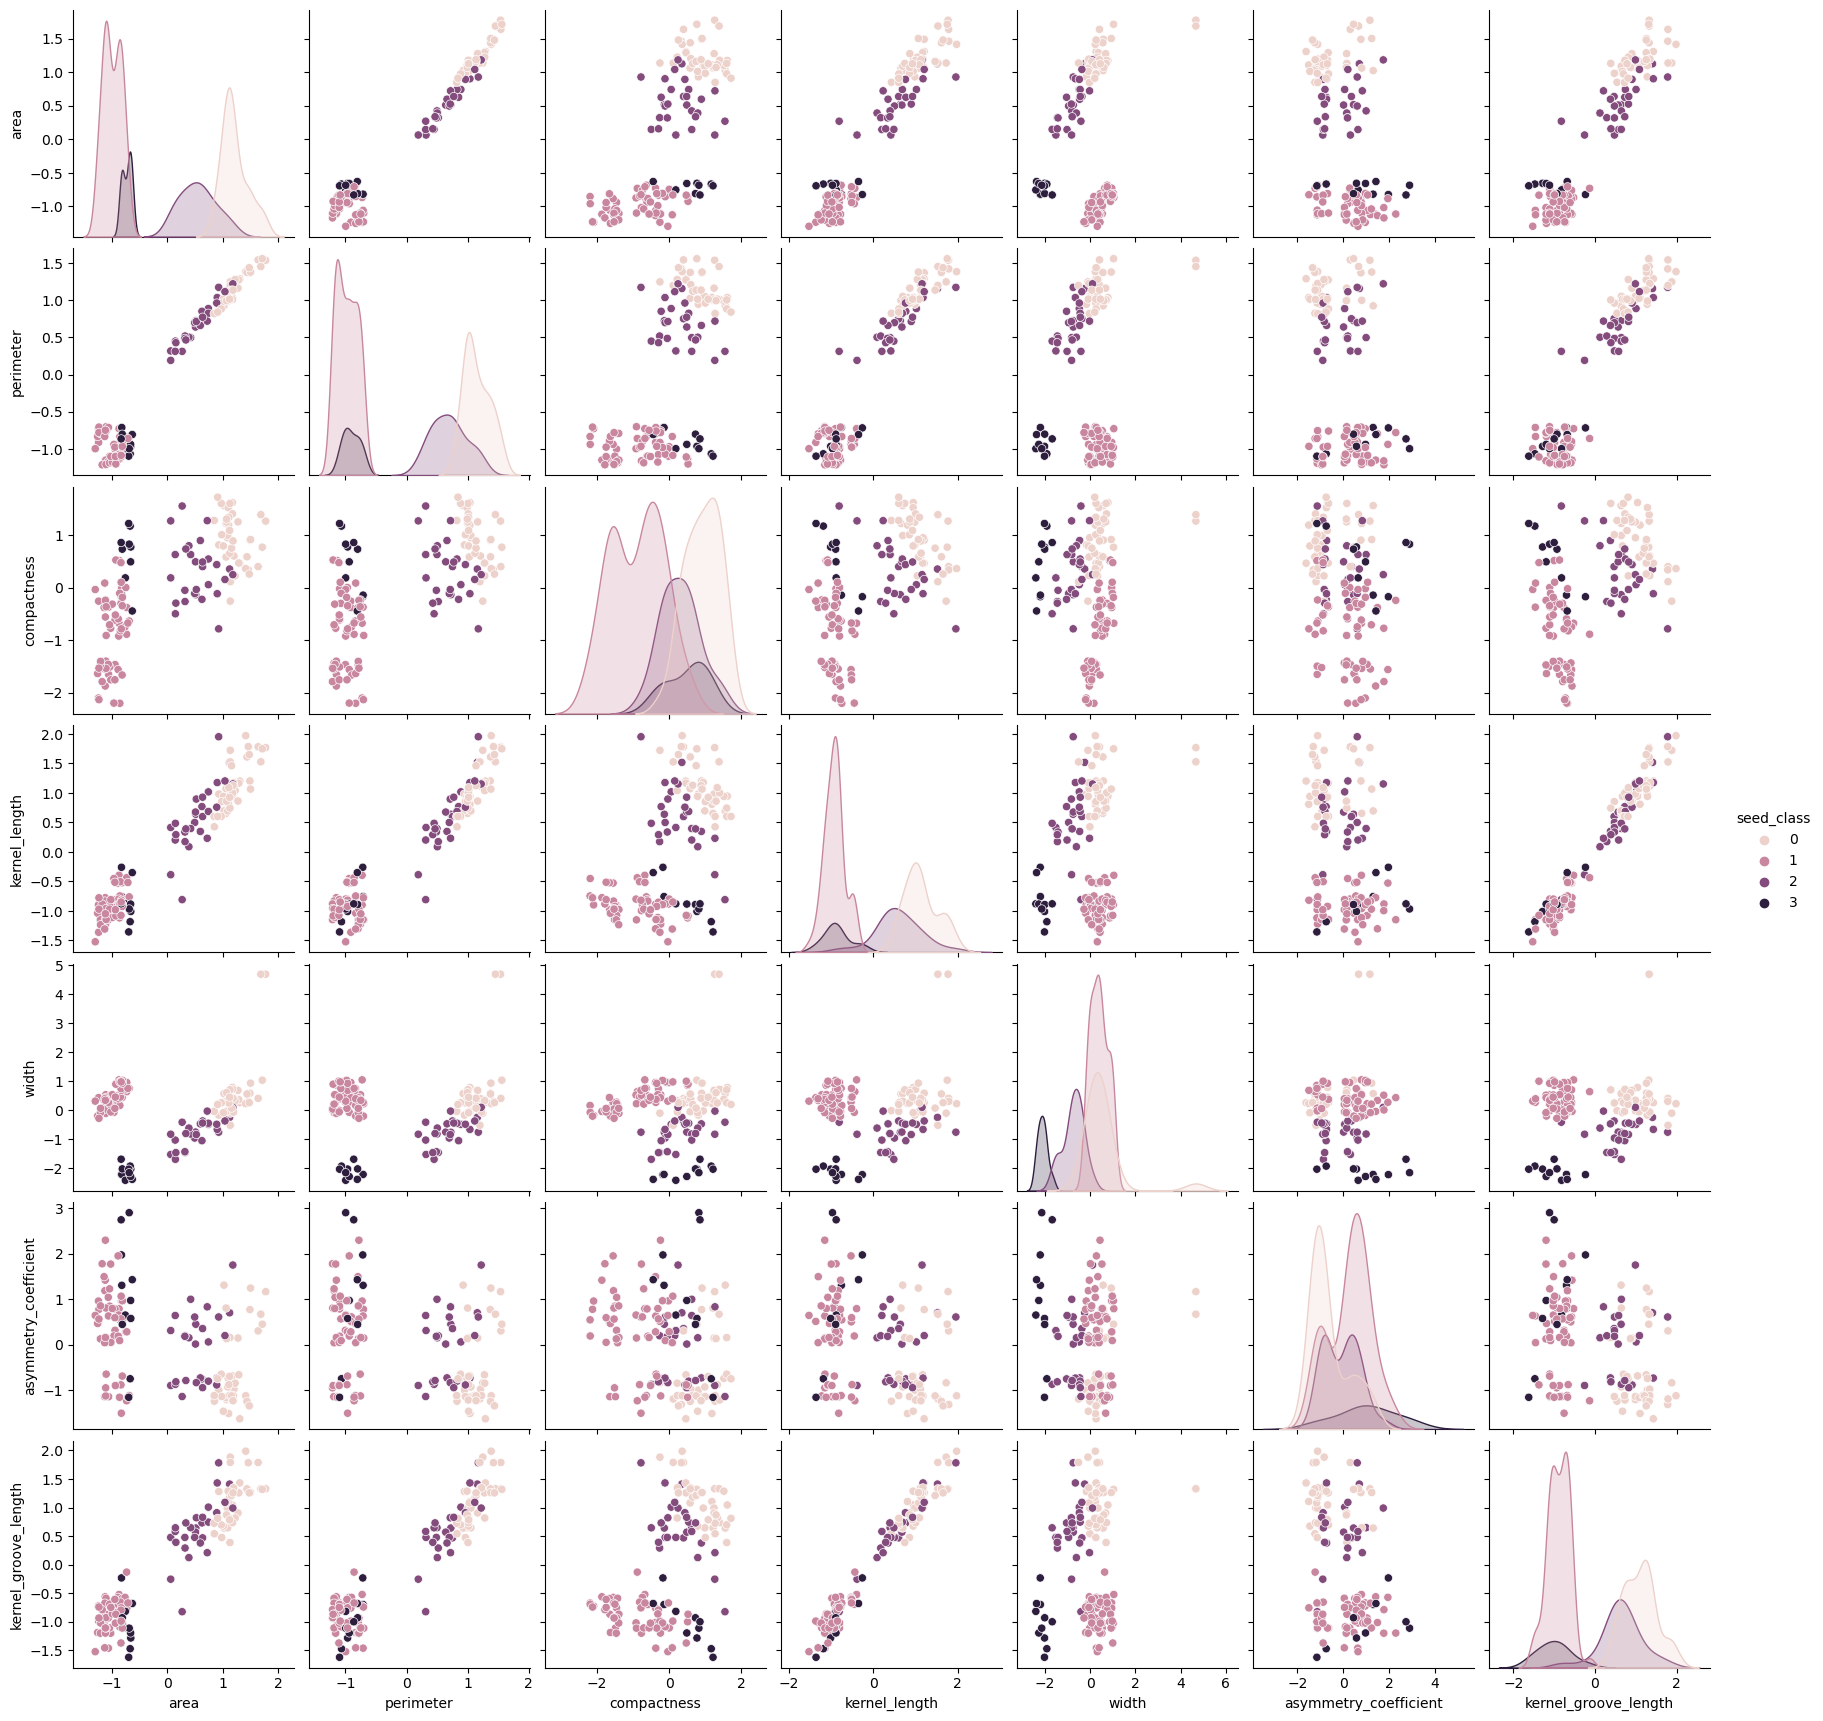

In [12]:
sns.pairplot(df1, hue = 'seed_class')

### 5. k-Medoids Cluster Analysis


#### 5.1. k-medoids Clustering

Next, cluster your scaled seeds dataset into the number of clusters that you selected in 4.1 (ie. the number of subclusters your t-SNE plot suggested) using k-Medoids. Use a random state of 100.


In [13]:
df1 = df1.drop(['seed_class'], axis = 1)
kmeans=KMedoids(n_clusters=4, random_state=100).fit(df1)


#### 5.2 t-SNE and k-Medoids

Color code the points in your selected t-SNE plot with the k-means cluster labels from 5.1.

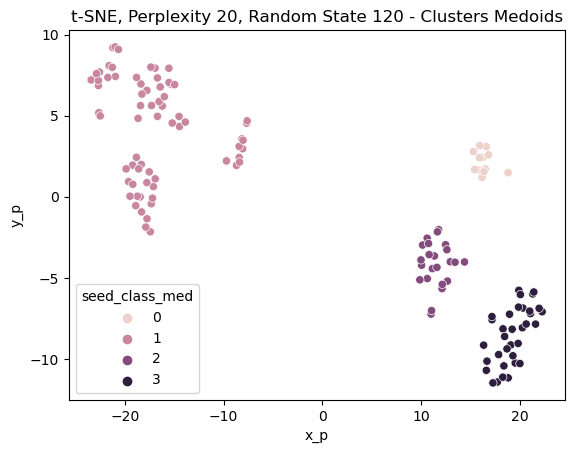

In [14]:
df1['seed_class_med'] = kmeans.labels_

tsne = TSNE(n_components = 2, perplexity = 20, random_state = 120)
datsne = tsne.fit_transform(df1)
df_t = pd.DataFrame(datsne, columns = ['x_p', 'y_p'])
df_c = pd.concat([df1, df_t], axis = 1)
sns.scatterplot(x = 'x_p', y = 'y_p', hue = 'seed_class_med', data = df_c)
plt.title('t-SNE, Perplexity 20, Random State 120 - Clusters Medoids')
plt.show()

#### 5.3. t-SNE vs. k-medoids

To what extent does the clustering suggested by k-medoids (using the t-SNE plot for k selection) agree with the clustering structure suggested by the t-SNE plot?

There is a big agreement. K-medoids is able to identify singular clusters that can also be observed in the t-SNE plot when K = 2. K-medoids is  able to identify a big group similarly to tSNE, and the other group observed in t-SNE is perfectly separated by 3 subclusters.

#### 5.4. More Analysis

Plot each pair of attributes in your scaled dataset and color code the points by your k-mean cluster labels from 5.1.

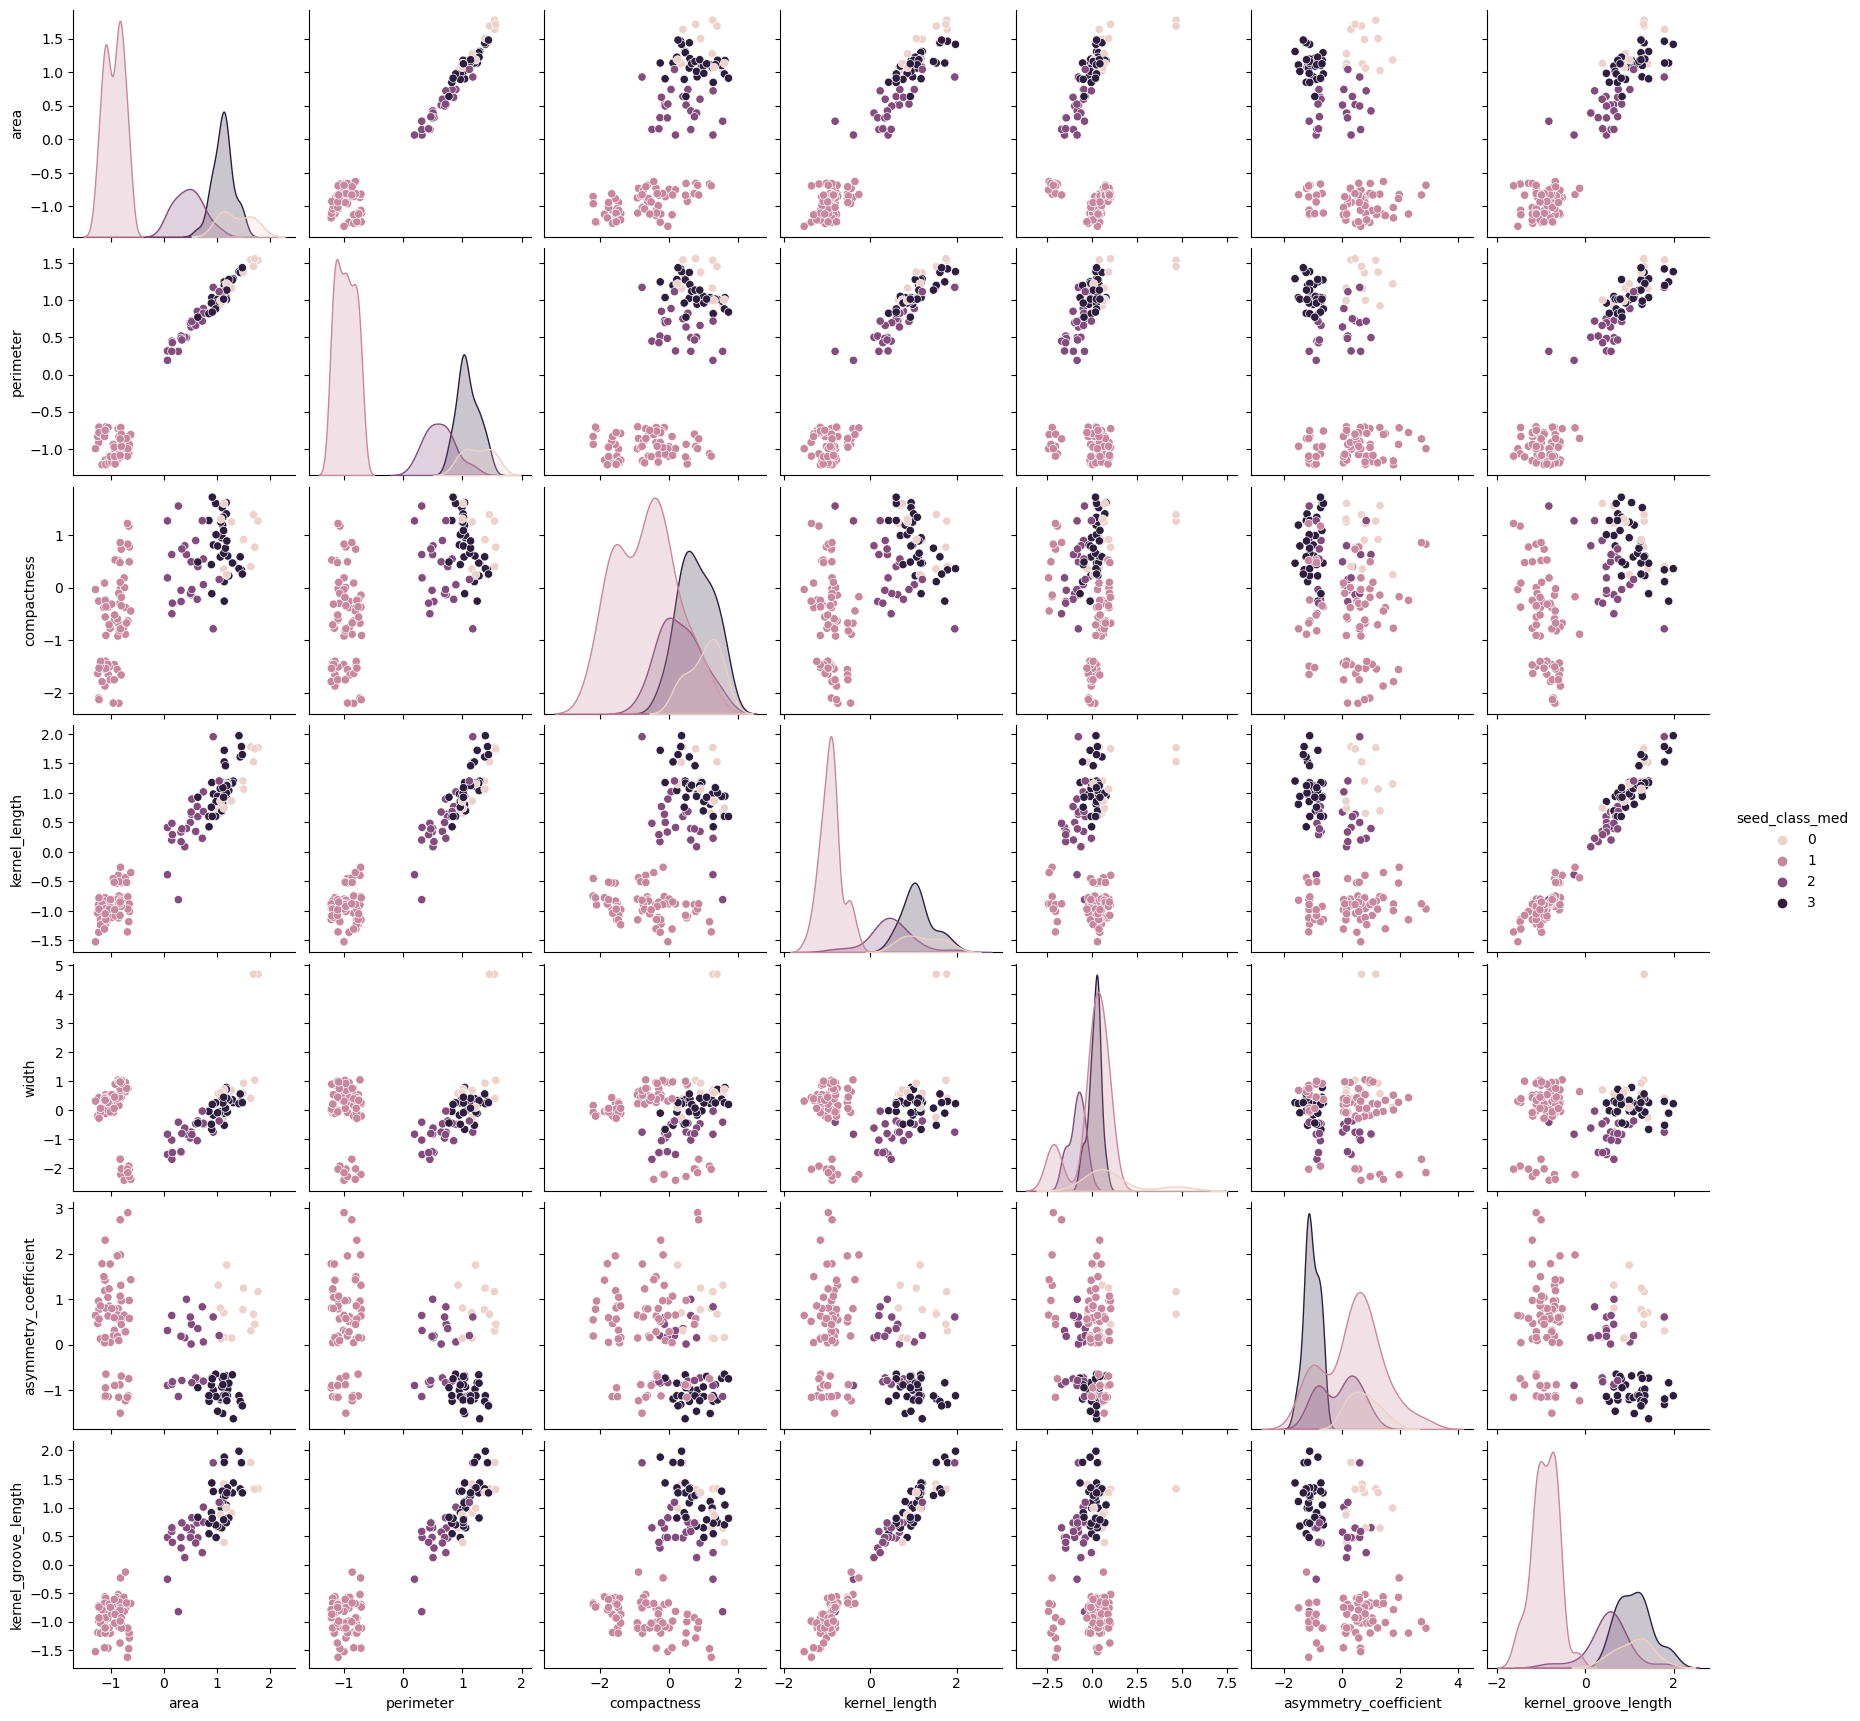

In [15]:
sns.pairplot(df1, hue = 'seed_class_med')

## <u>Case Study 2</u>: Using t-SNE Plots for Different Types of Numerical Variables

Recall that the t-SNE algorithm that we have discussed so far is only meant to be used for a purely numerical dataset. Even transforming categorical variables into 0/1 indicator variables may cause your resulting t-SNE plots to lose their interpretative value.

In certain settings, we also need to be careful about using t-SNE plots when using discrete variables as well.

In this case study below we will use the t-SNE algorithm on the following 8 datasets:
* dataset1.csv
* dataset1_integer_x.csv
* dataset2.csv
* dataset2_integer_x.csv
* dataset3.csv
* dataset3_integer_x.csv
* dataset4.csv
* dataset4_integer_x.csv


Each of the **'dataset#.csv'** files contain artificially generated 2 dimensional values that are all continuous. Each of the **'dataset#_integer_x.csv'** files include the same dataset as in the corresponding **'dataset#.csv'**, but the first variable's continuous values have been discretized into integer values.

We will examine each of these datasets with our t-SNE algorithm to build an intution for:
* when the t-SNE algorithm may or may not be reliable in effectively describing the underlying clustering structure of different types of numerical datasets and
* when you should be skeptical about the interpretative value of your t-SNE plots for a high dimensional dataset.

## 1. Dataset 1



### 1.1. Continuous Dataset

#### 1.1.1 t-SNE Plots

First, read the dataset1.csv file into a dataframe. Then use 6 different perplexity values and at least two random states for each perplexity value two map this 2-d dataframe onto another two-dimensional dataset using the t-SNE algorithm. Show your projected coordinates in a scatterplot for each combination of random state and perplexity value.

In [16]:
data1 = pd.read_csv('dataset1.csv')

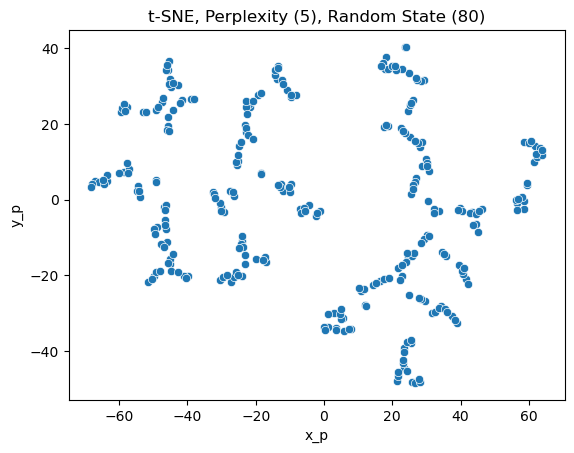

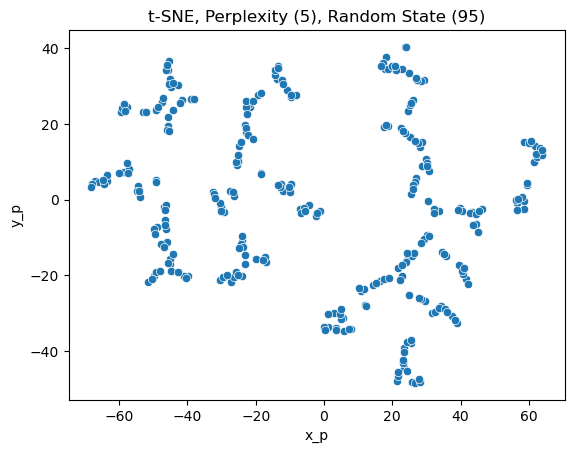

-\-\-\


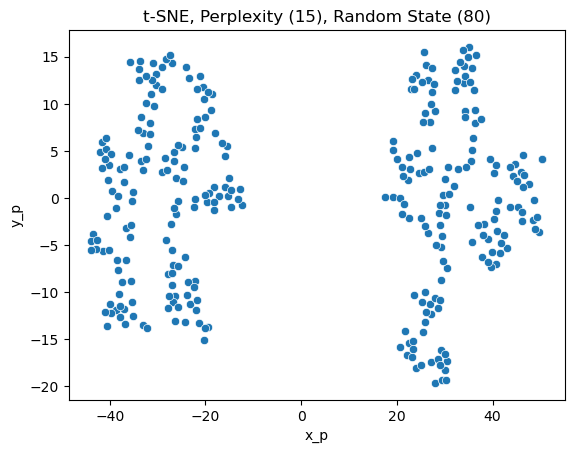

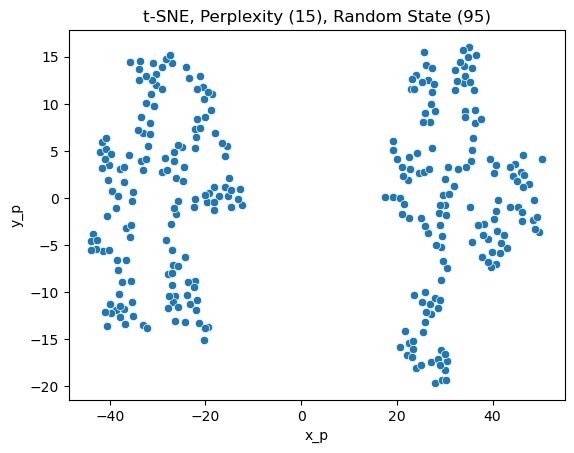

-\-\-\


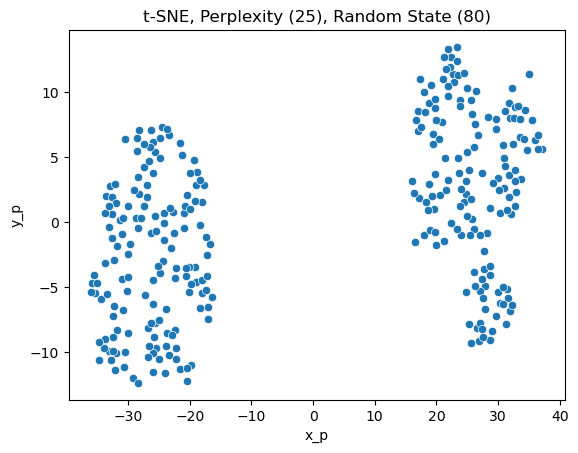

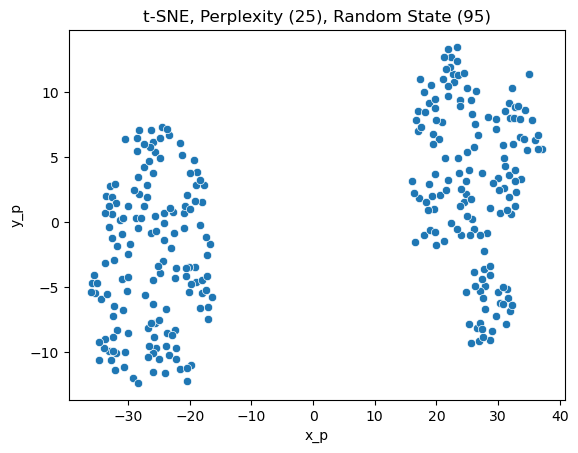

-\-\-\


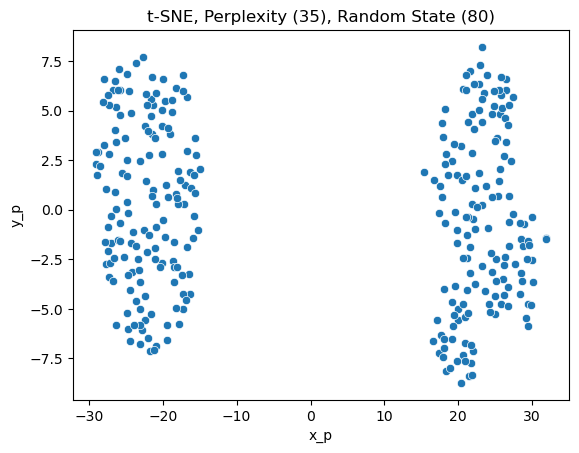

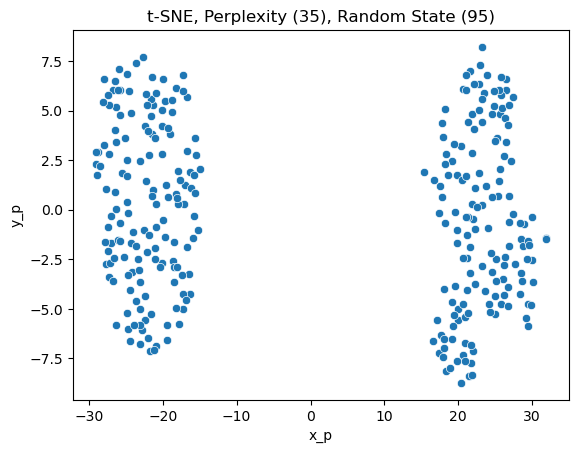

-\-\-\


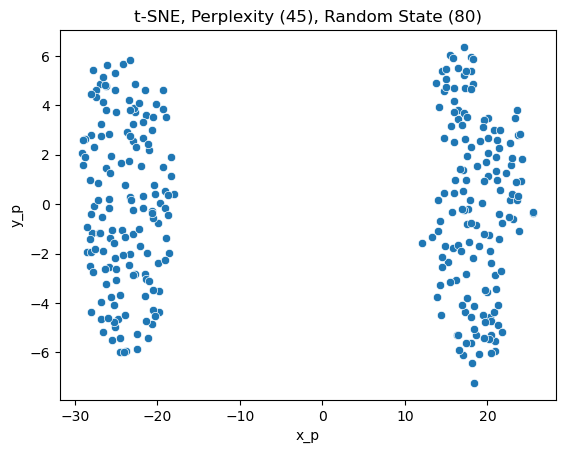

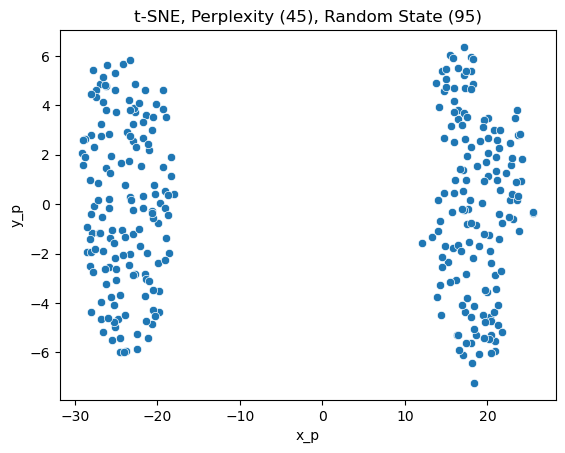

-\-\-\


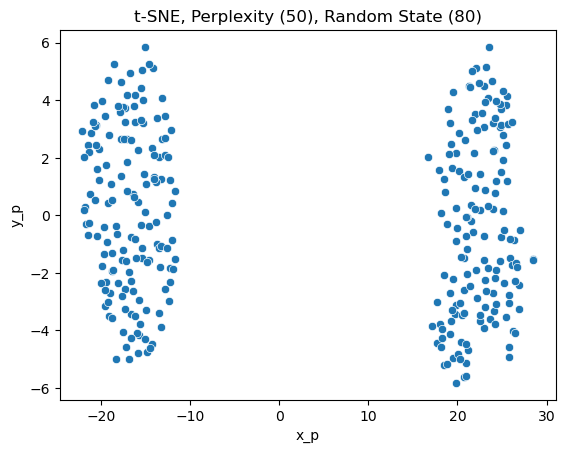

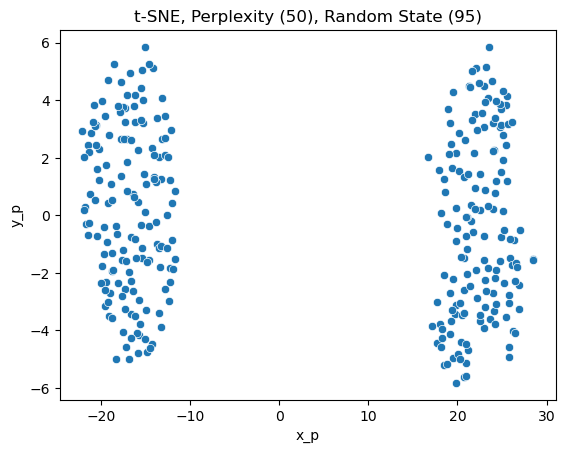

-\-\-\


In [17]:
for i in [5,15,25,35,45,50]:
    for k in [80, 95]:
        tsne = TSNE(n_components = 2, perplexity = i, random_state = k)
        datsne = tsne.fit_transform(data1)
        df_t = pd.DataFrame(datsne, columns = ['x_p', 'y_p'])
        df_c = pd.concat([data1, df_t], axis = 1)
        sns.scatterplot(x = 'x_p', y = 'y_p', data = df_c)
        plt.title('t-SNE, Perplexity (%s), Random State (%s)' %(i,k))
        plt.show()
    print('-\\-\\-\\')

#### 1.1.2. Interpretation

Use your t-SNE plots above to answer the following questions.

1. Is this dataset clusterable?

Yes, the data is clusterable

2. If so, how many clusters does the dataset have?

There are a total of two clusters

3. If so, are the clusters spherical?

The clusters are spherical

4. If so, are the clusters well-separated?

The clusters are well separated

5. If you have identified some "main clusters" from these plots, is there strong evidence that some of these "main clusters" may be comprised of some "subclusters"?

No, by looking at different perplexity values, it is possible to observe a strong structure of 2 clusters. In each clusters is not possible to observe any subcluster.

#### 1.1.3. Corroborating

The purpose of this case study is to build intuition about how/why the t-SNE algorithm works the way that it does under different scenarios. Plot your original dataset1 data and confirm (or deny) which of your answers that you gave above were true or false. If an interpretation that you made from the t-SNE plot was wrong, explain why the t-SNE algorithm may not be as effective in interpreting the underlying clustering structure for this particular dataset.

<Axes: xlabel='x', ylabel='y'>

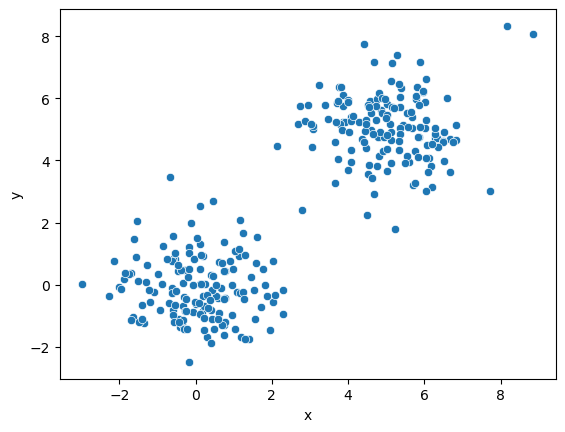

In [18]:
sns.scatterplot(x = 'x', y = 'y', data = data1)

The actual dataset above is clusterable, has two well-separated, spherical clusters. This is exactly what we intepreted from our t-SNE plots above.

There is perfect matching with the answers provided in the previous section



### 1.2. Partially Discretized Dataset

#### 1.2.1 t-SNE Plots

First, read the dataset1_integer_x.csv file into a dataframe. Then use 6 different perplexity values and at least two random states for each perplexity value two map this 2-d dataframe onto another two-dimensional dataset using the t-SNE algorithm. Show your projected coordinates in a scatterplot for each combination of random state and perplexity value.

In [19]:
data11 = pd.read_csv('dataset1_integer_x.csv')

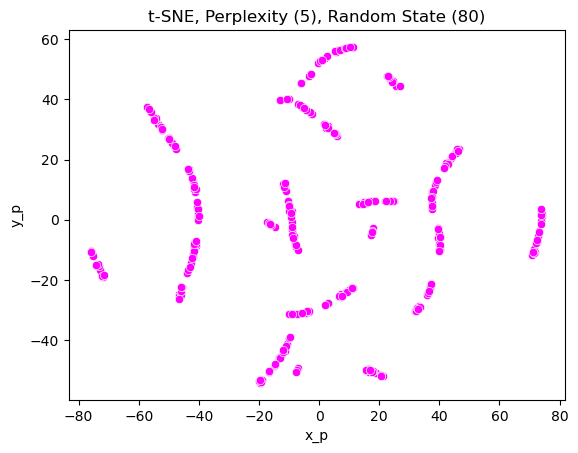

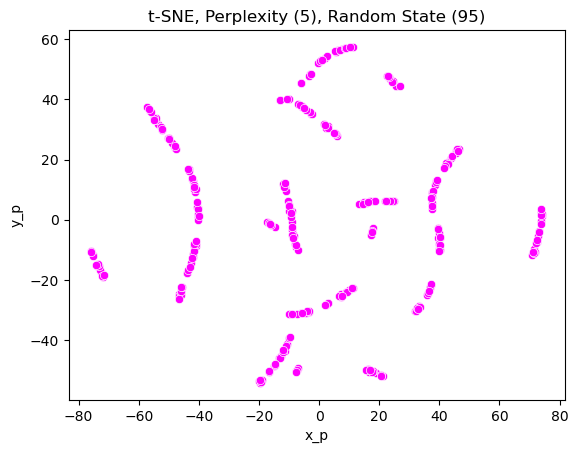

-\-\-\


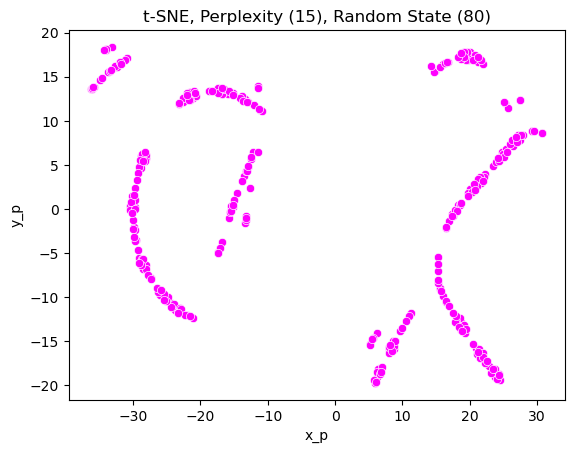

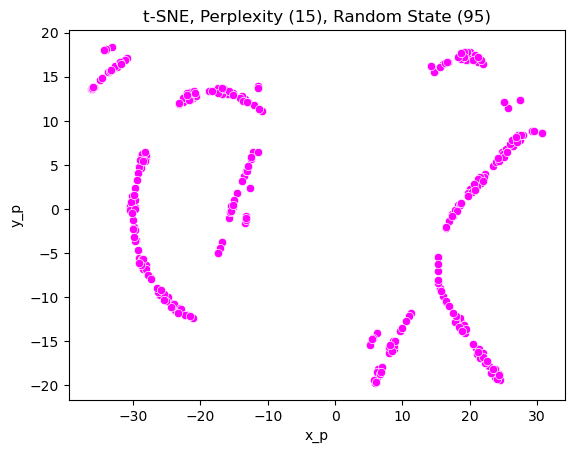

-\-\-\


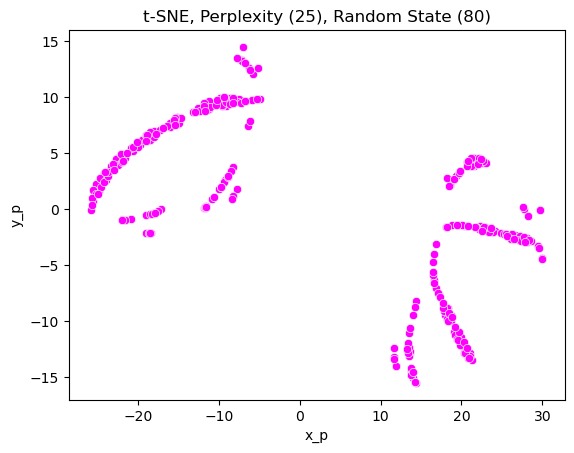

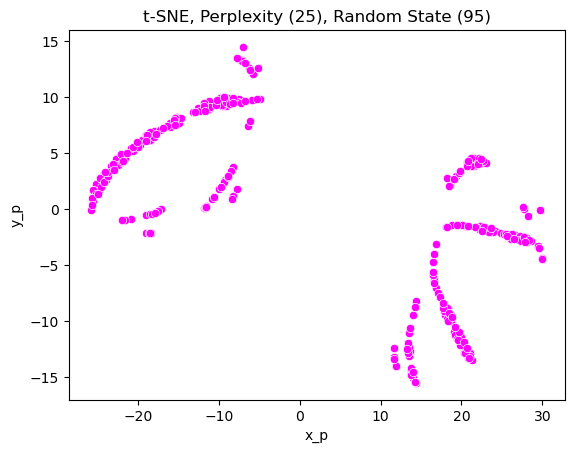

-\-\-\


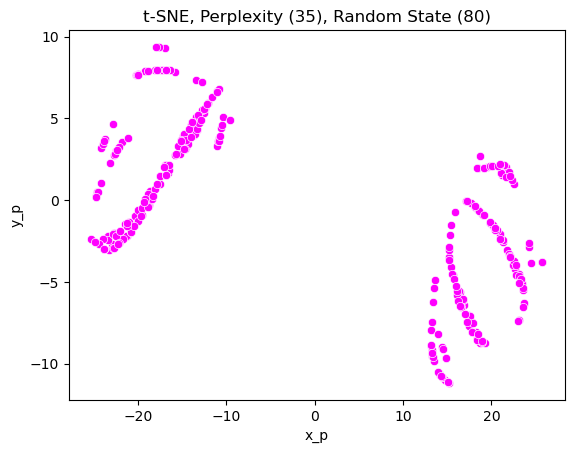

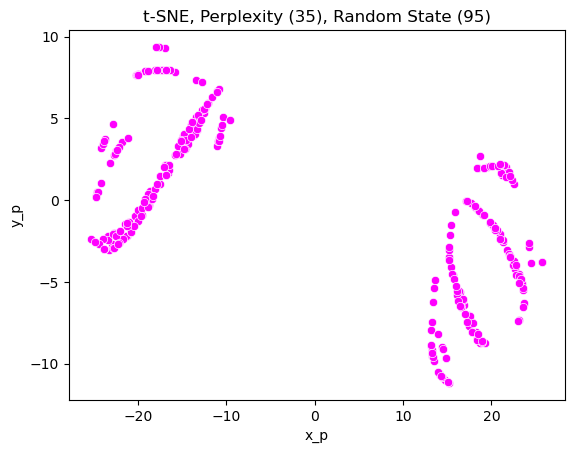

-\-\-\


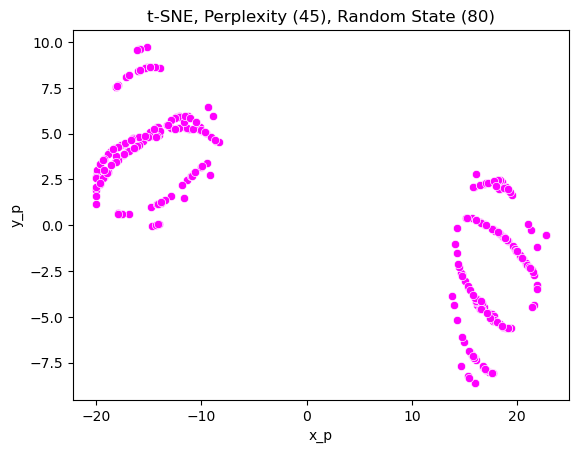

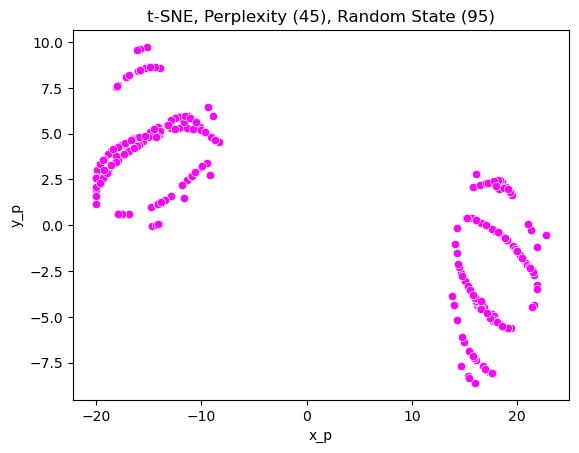

-\-\-\


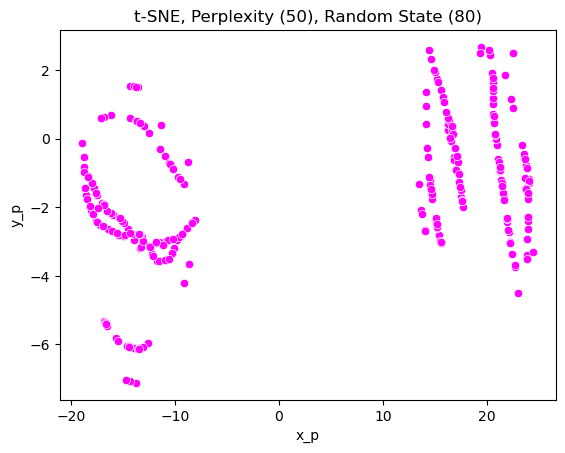

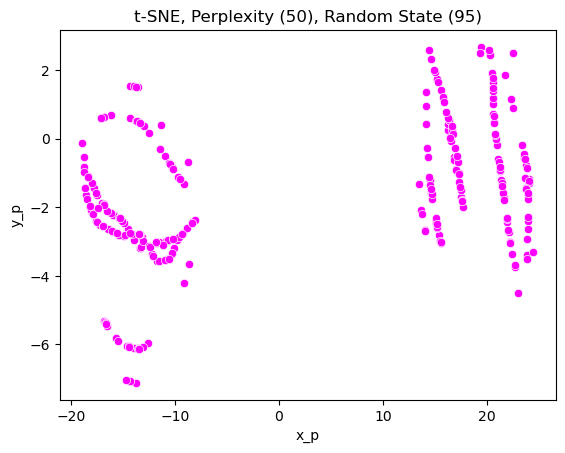

-\-\-\


In [20]:
for i in [5,15,25,35,45,50]:
    for k in [80, 95]:
        tsne = TSNE(n_components = 2, perplexity = i, random_state = k)
        datsne = tsne.fit_transform(data11)
        df_t = pd.DataFrame(datsne, columns = ['x_p', 'y_p'])
        df_c = pd.concat([data11, df_t], axis = 1)
        sns.scatterplot(x = 'x_p', y = 'y_p', data = df_c, color = 'magenta')
        plt.title('t-SNE, Perplexity (%s), Random State (%s)' %(i,k))
        plt.show()
    print('-\\-\\-\\')

#### 1.2.2. Interpretation

Use your t-SNE plots above to answer the following questions.

1. Is this dataset clusterable?

Yes


2. If so, how many clusters does the dataset have?

There are two clusters

3. If so, are the clusters spherical?

Both clusters appear to be spherical

4. If so, are the clusters well-separated?

Both cluster are well sepparate

5. If you have identified some "main clusters" from these plots, is there strong evidence that some of these "main clusters" may be comprised of some "subclusters"?

No, there's no subclusters in the main cluster structure

#### 1.2.3. Different t-SNE Plots

Plot your original dataset1_integer_x.csv data. Were you interpretations of the t-SNE plots for the continuous dataset from 1.1 different from your interpretation of the t-SNE plots for the partially discretized dataset from 1.2?
* If so, explain why you may have had different interpretation and/or seen different t-SNE plots.
* If not, explain why they may have been mostly the same.

<Axes: xlabel='x', ylabel='y'>

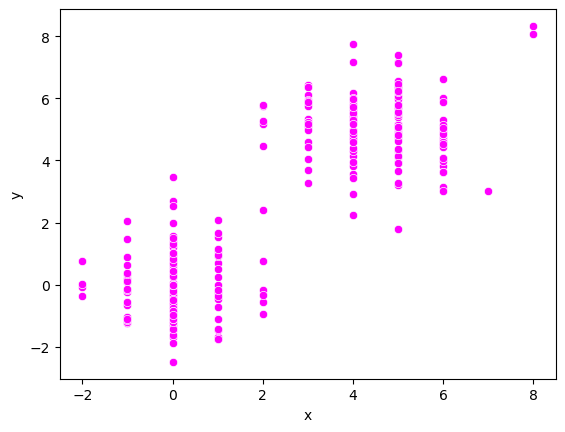

In [21]:
sns.scatterplot(x = 'x', y = 'y', data = data11, color = 'magenta')

No the interpretation was the mostly the same. Even though this data is partially discretized, it is possible to observe that it retains a clustering structure. It is like taking the continuous data and subset for specific values of X. The structure is preserved

## 2. Dataset 2



### 2.1. Continuous Dataset

#### 2.1.1 t-SNE Plots

First, read the dataset2.csv file into a dataframe. Then use 6 different perplexity values and at least two random states for each perplexity value two map this 2-d dataframe onto another two-dimensional dataset using the t-SNE algorithm. Show your projected coordinates in a scatterplot for each combination of random state and perplexity value.

In [22]:
data2 = pd.read_csv('dataset2.csv')

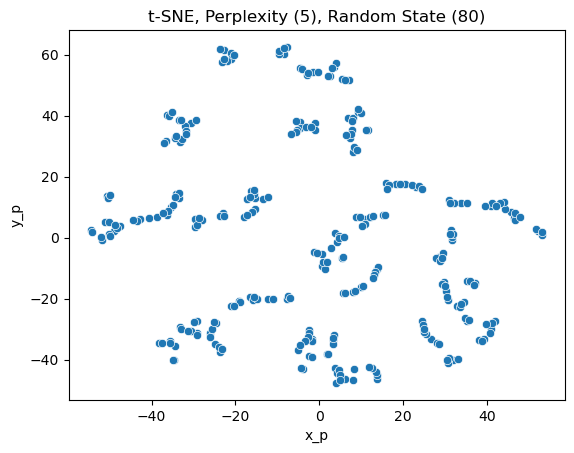

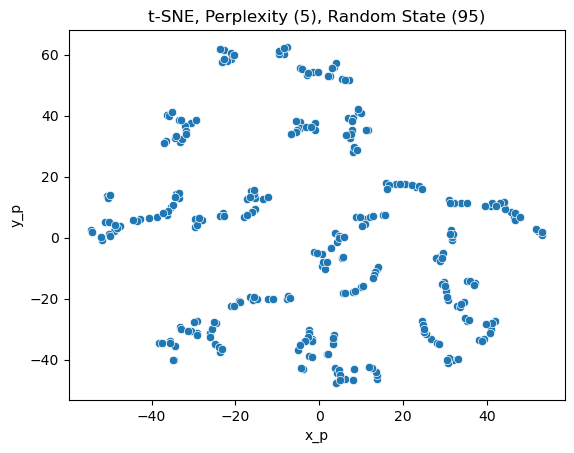

-\-\-\


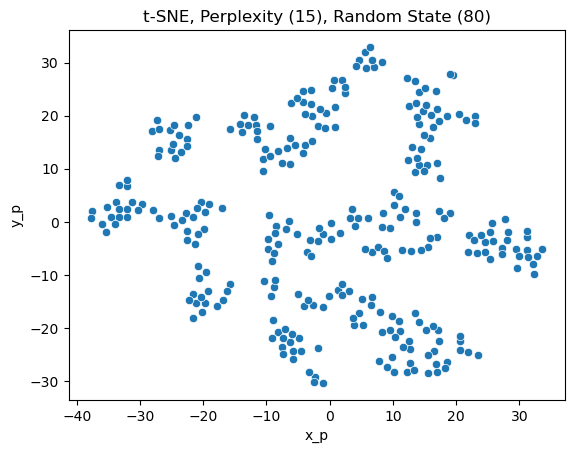

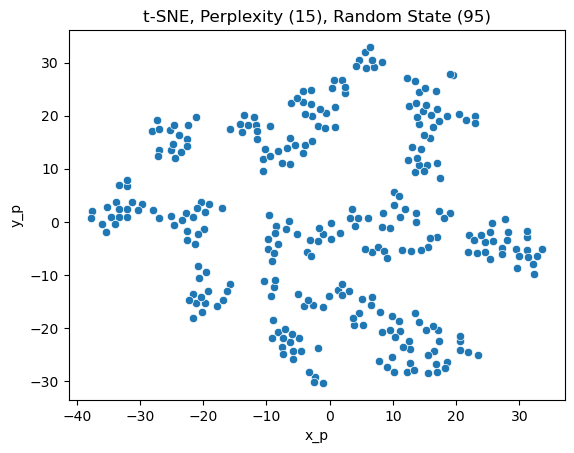

-\-\-\


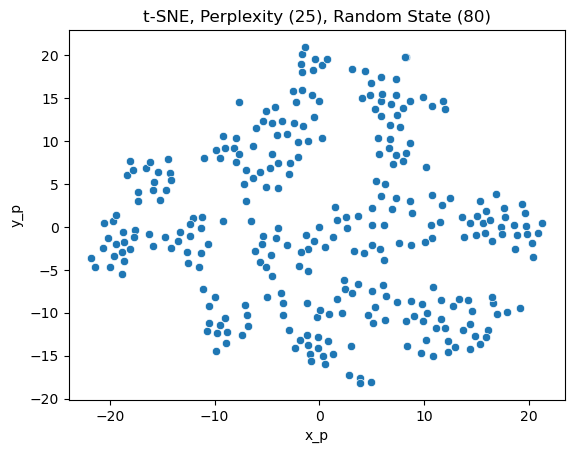

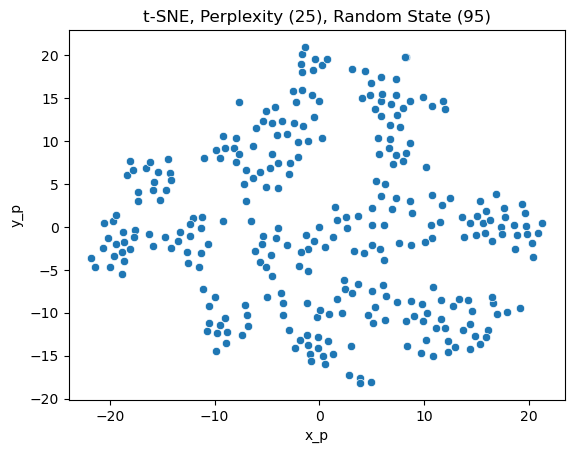

-\-\-\


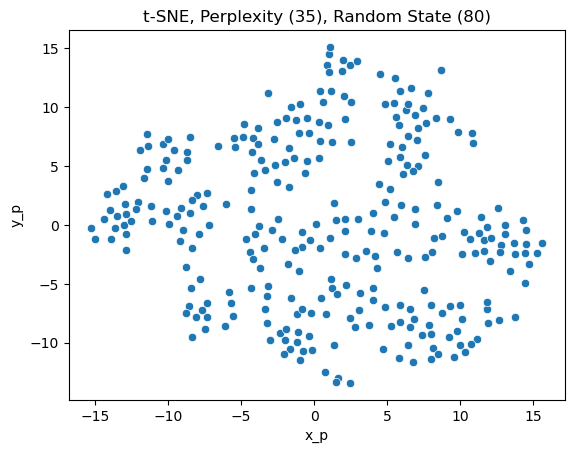

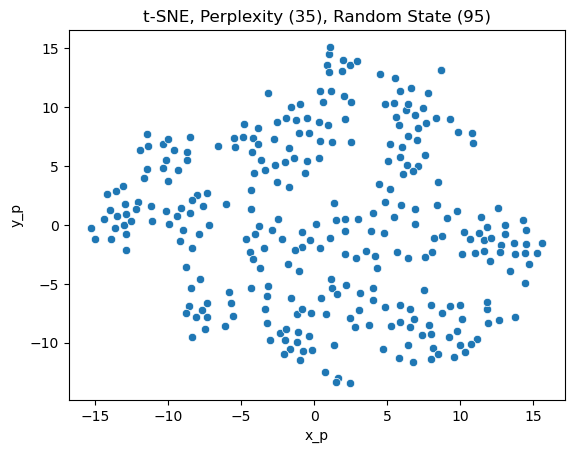

-\-\-\


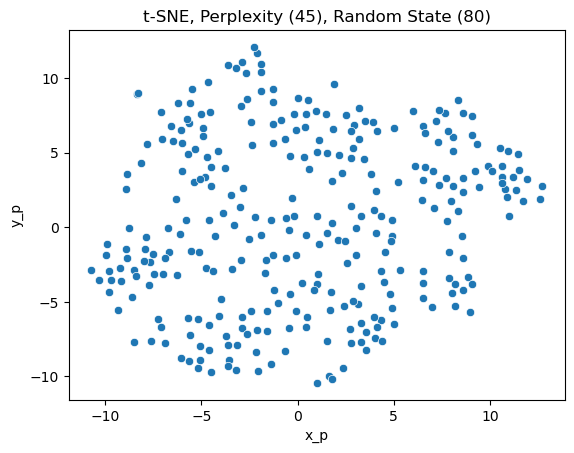

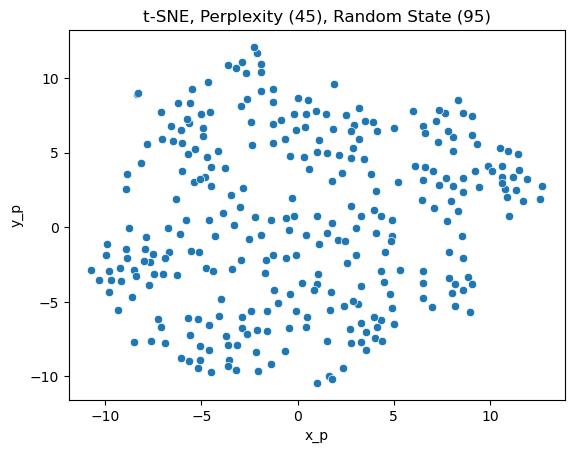

-\-\-\


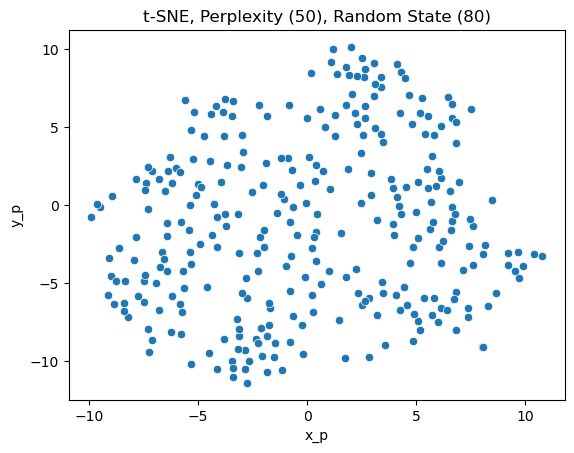

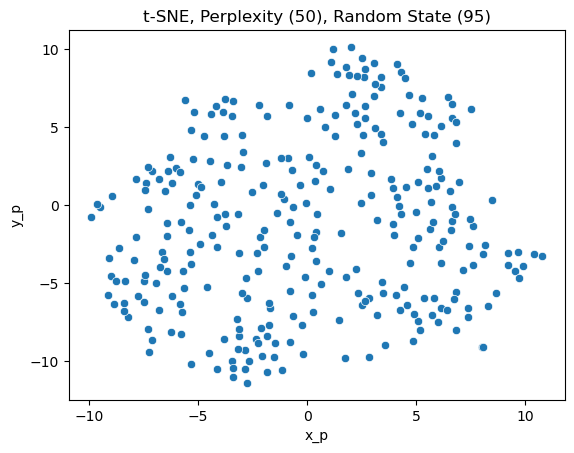

-\-\-\


In [23]:
for i in [5,15,25,35,45,50]:
    for k in [80, 95]:
        tsne = TSNE(n_components = 2, perplexity = i, random_state = k)
        datsne = tsne.fit_transform(data2)
        df_t = pd.DataFrame(datsne, columns = ['x_p', 'y_p'])
        df_c = pd.concat([data11, df_t], axis = 1)
        sns.scatterplot(x = 'x_p', y = 'y_p', data = df_c)
        plt.title('t-SNE, Perplexity (%s), Random State (%s)' %(i,k))
        plt.show()
    print('-\\-\\-\\')

#### 2.1.2. Interpretation

Use your t-SNE plots above to answer the following questions.

1. Is this dataset clusterable?

No, no cluster was vissible

2. If so, how many clusters does the dataset have?
3. If so, are the clusters spherical?
4. If so, are the clusters well-separated?
5. If you have identified some "main clusters" from these plots, is there strong evidence that some of these "main clusters" may be comprised of some "subclusters"?

#### 2.1.3. Corroborating

The purpose of this case study is to build intuition about how/why the t-SNE algorithm works the way that it does under different scenarios. Plot your original dataset2 data and confirm (or deny) which of your answers that you gave above were true or false. If an interpretation that you made from the t-SNE plot was wrong, explain why the t-SNE algorithm may not be as effective in interpreting the underlying clustering structure for this particular dataset.

<Axes: xlabel='x', ylabel='y'>

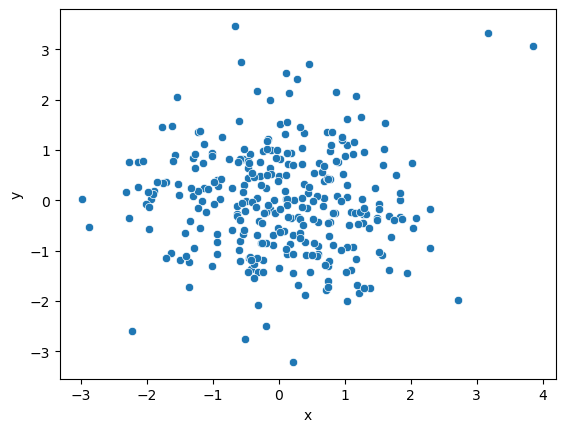

In [24]:
sns.scatterplot(x = 'x', y = 'y', data = data2)

The interpretation from tSNE is correct. It is possible to observe that the data does not have a clustering structure



### 2.2. Partially Discretized Dataset

#### 2.2.1 t-SNE Plots

First, read the dataset2_integer_x.csv file into a dataframe. Then use 6 different perplexity values and at least two random states for each perplexity value two map this 2-d dataframe onto another two-dimensional dataset using the t-SNE algorithm. Show your projected coordinates in a scatterplot for each combination of random state and perplexity value.

In [25]:
data22 = pd.read_csv('dataset2_integer_x.csv')

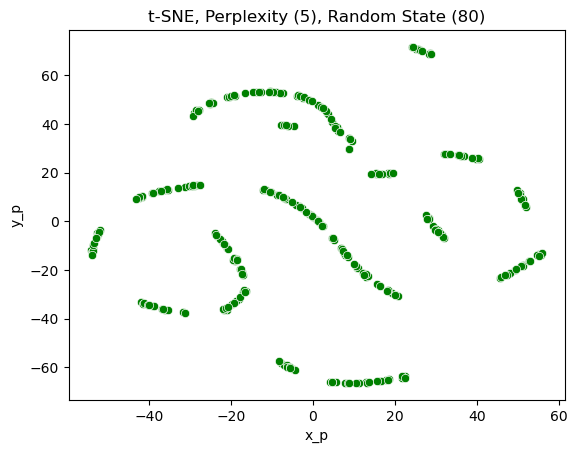

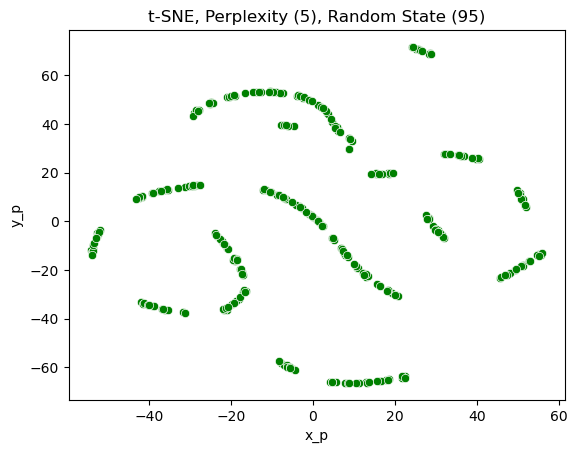

-\-\-\


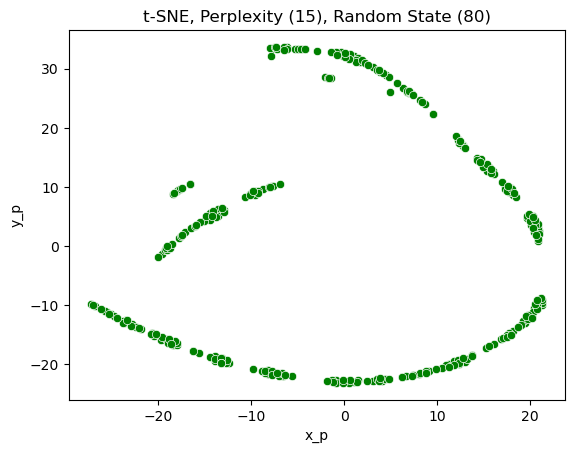

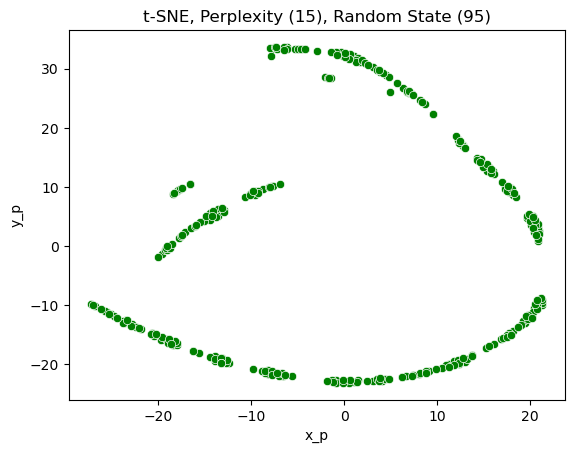

-\-\-\


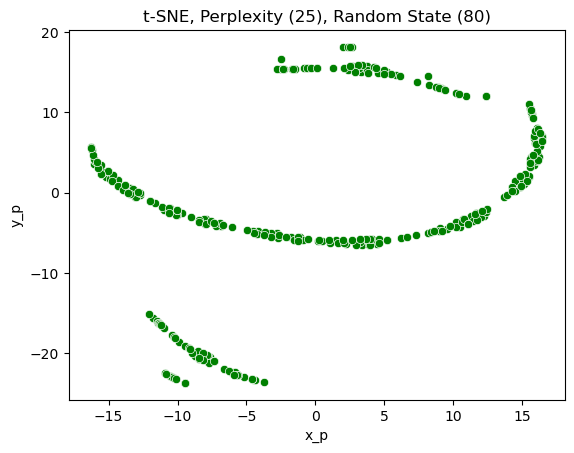

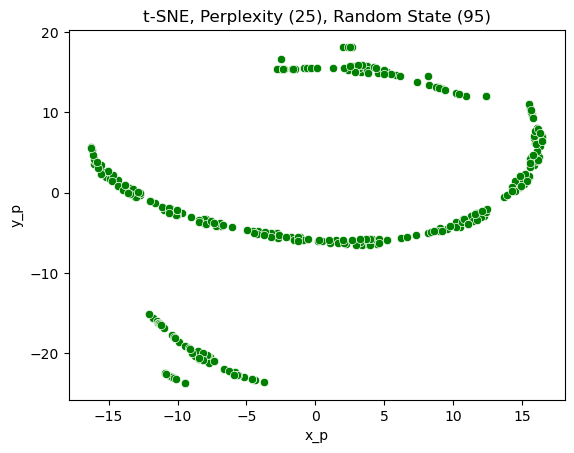

-\-\-\


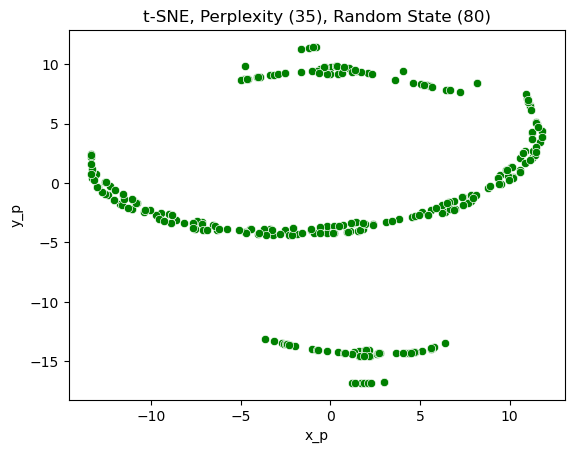

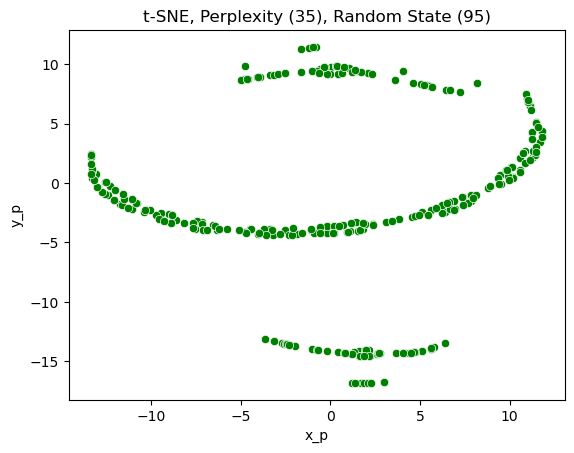

-\-\-\


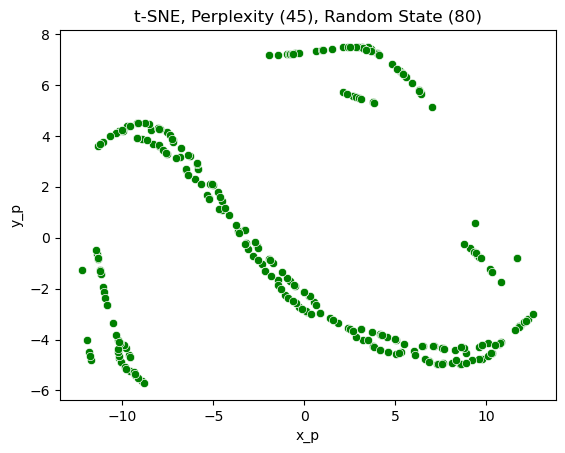

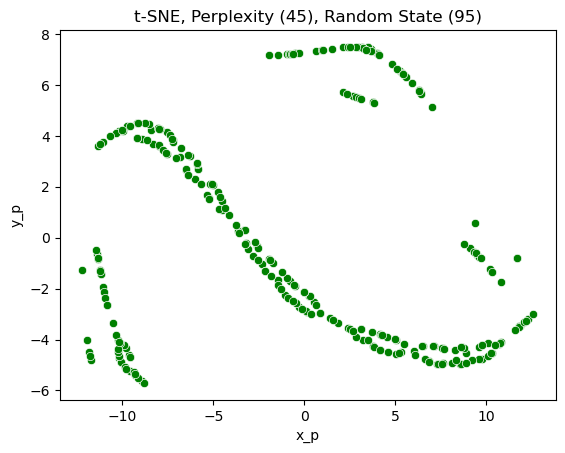

-\-\-\


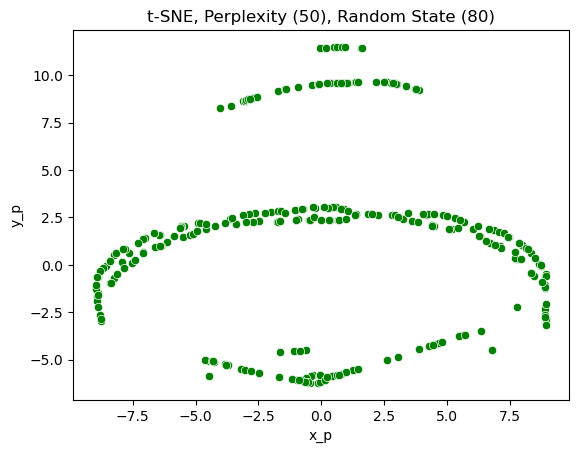

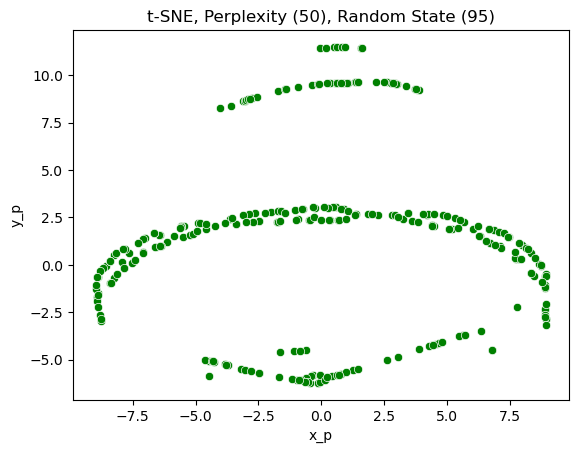

-\-\-\


In [26]:
for i in [5,15,25,35,45,50]:
    for k in [80, 95]:
        tsne = TSNE(n_components = 2, perplexity = i, random_state = k)
        datsne = tsne.fit_transform(data22)
        df_t = pd.DataFrame(datsne, columns = ['x_p', 'y_p'])
        df_c = pd.concat([data11, df_t], axis = 1)
        sns.scatterplot(x = 'x_p', y = 'y_p', data = df_c, color = 'green')
        plt.title('t-SNE, Perplexity (%s), Random State (%s)' %(i,k))
        plt.show()
    print('-\\-\\-\\')

#### 2.2.2. Interpretation

Use your t-SNE plots above to answer the following questions.

1. Is this dataset clusterable?

Yes

2. If so, how many clusters does the dataset have?

Three clusters

3. If so, are the clusters spherical?

No

4. If so, are the clusters well-separated?

Clusters are not spherical but they appear well separated

5. If you have identified some "main clusters" from these plots, is there strong evidence that some of these "main clusters" may be comprised of some "subclusters"?

No subclusters are observed

#### 2.2.3. Different t-SNE Plots

Plot your original dataset2_integer_x.csv data. Were your interpretations of the t-SNE plots for the continuous dataset from 2.1 different from your interpretation of the t-SNE plots for the partially discretized dataset from 2.2? 
* If so, explain why you may have had different interpretation and/or seen different t-SNE plots.
* If not, explain why they may have been mostly the same.

<Axes: xlabel='x', ylabel='y'>

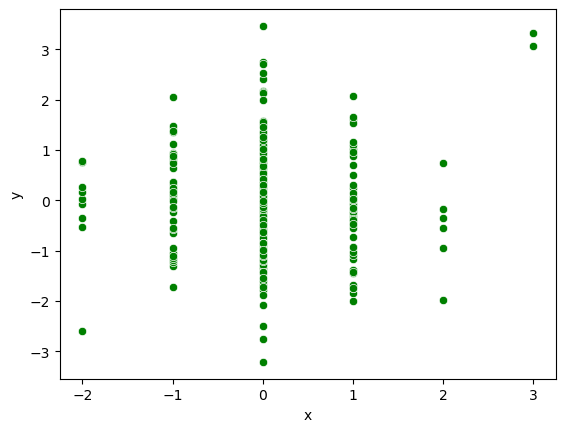

In [27]:
sns.scatterplot(x = 'x', y = 'y', data = data22, color = 'green')

Yes. They are different. In the case of the partially discretized dataset, it is possible to observed a clustering structure due to the effect that the discrete x variable has. Even when the data are spread similarly to plot 2.1, here, the neighboring points being aligned in a single x variable help to the formation of density clouds that will be identified as clusters for the tSNE algorithm. In the data 2.1 chains of a single cluster start forming when the algorithm is applied

## 3. Dataset 3



### 3.1. Continuous Dataset

#### 3.1.1 t-SNE Plots

First, read the dataset3.csv file into a dataframe. Then use 6 different perplexity values and at least two random states for each perplexity value two map this 2-d dataframe onto another two-dimensional dataset using the t-SNE algorithm. Show your projected coordinates in a scatterplot for each combination of random state and perplexity value.

In [28]:
data3 = pd.read_csv('dataset3.csv')

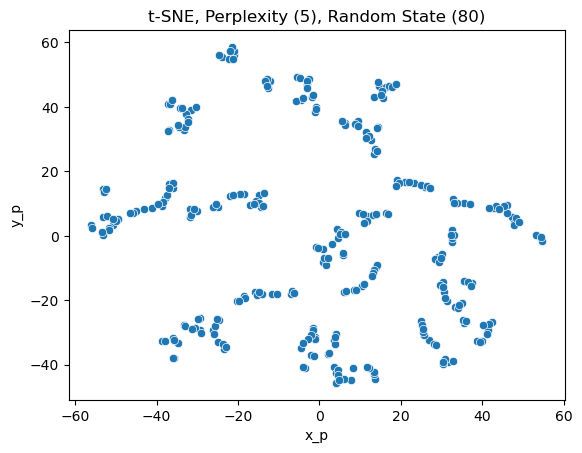

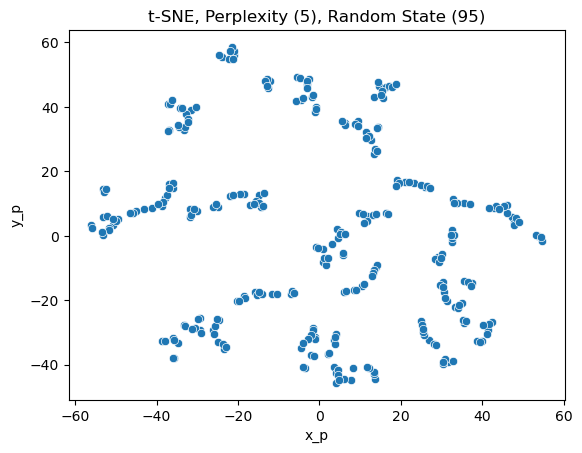

-\-\-\


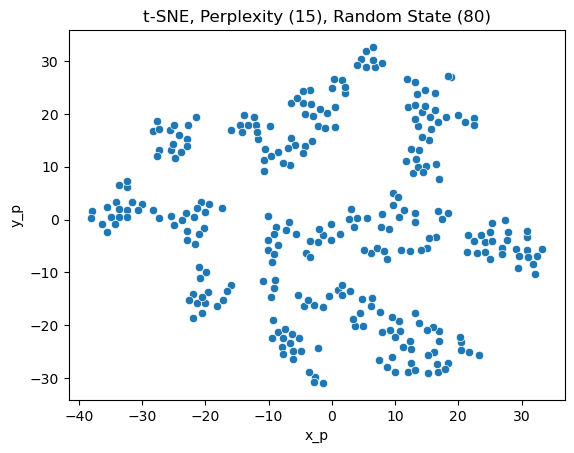

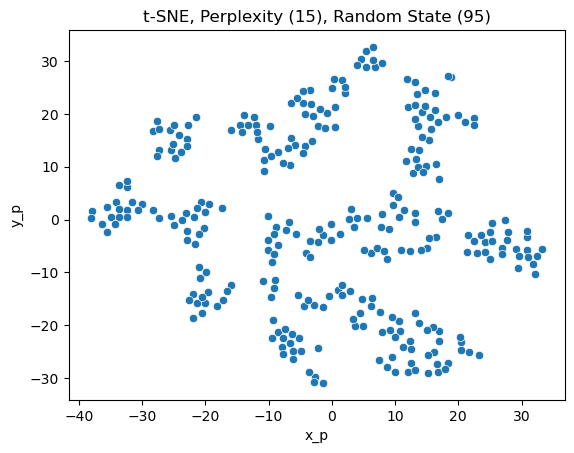

-\-\-\


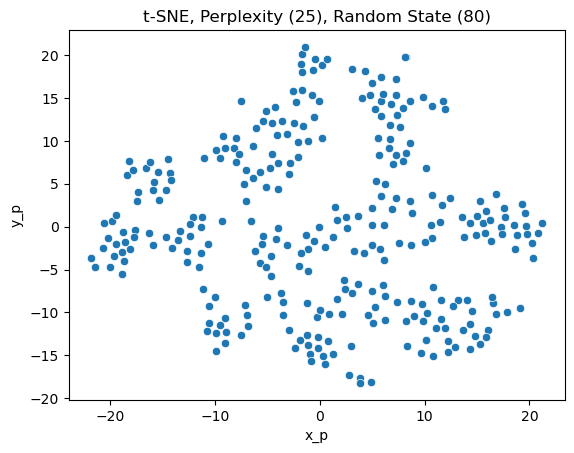

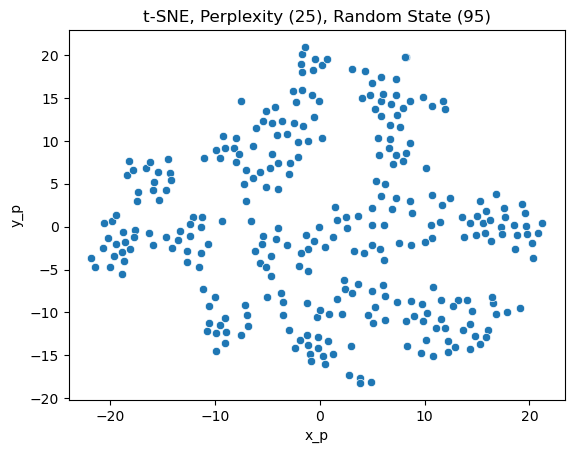

-\-\-\


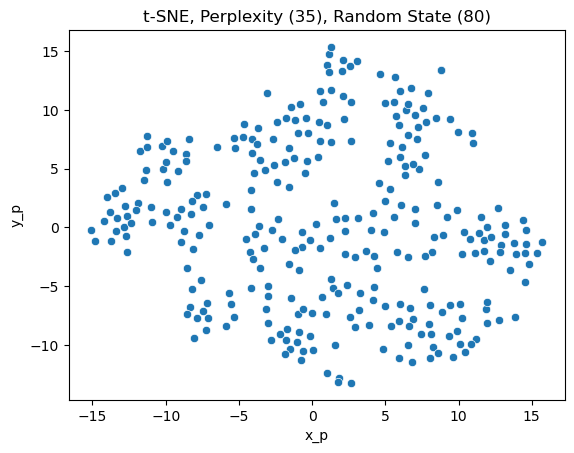

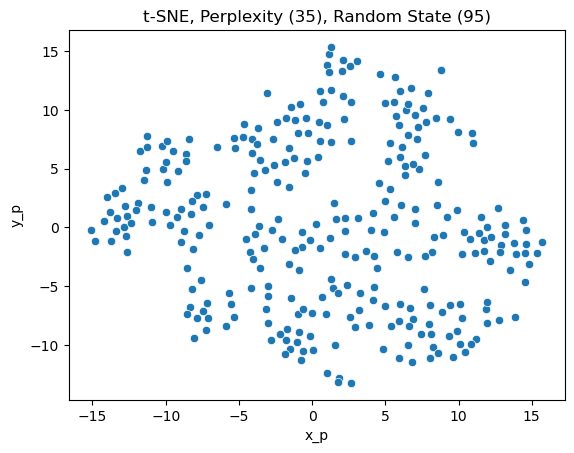

-\-\-\


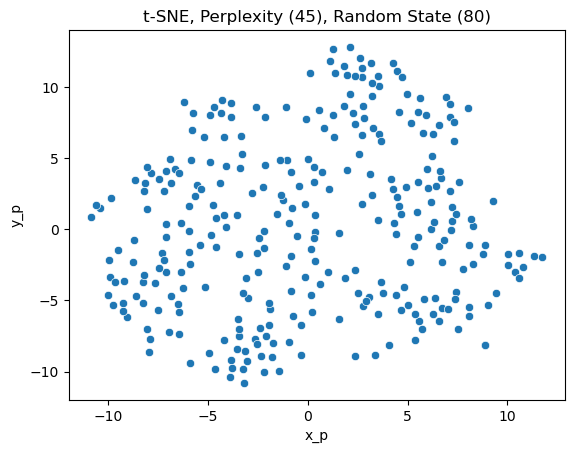

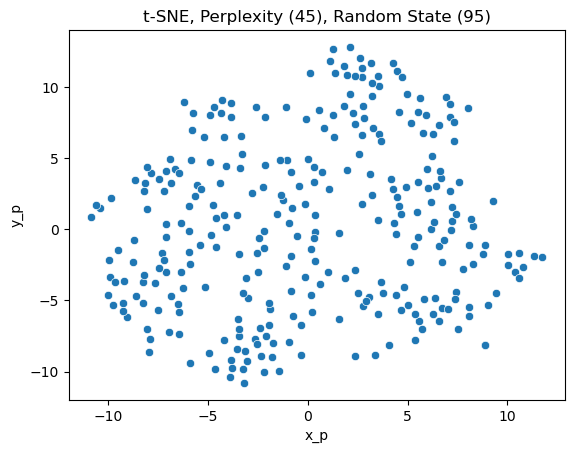

-\-\-\


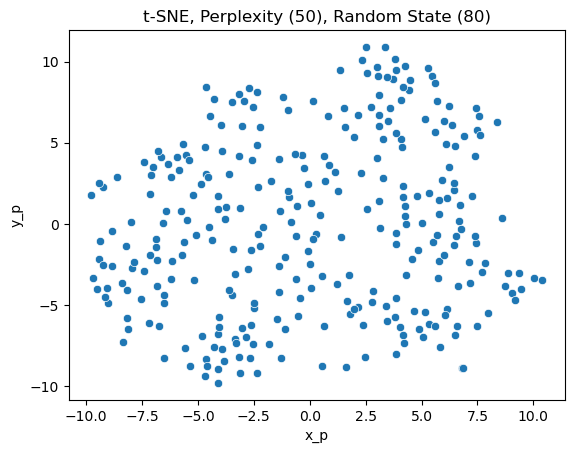

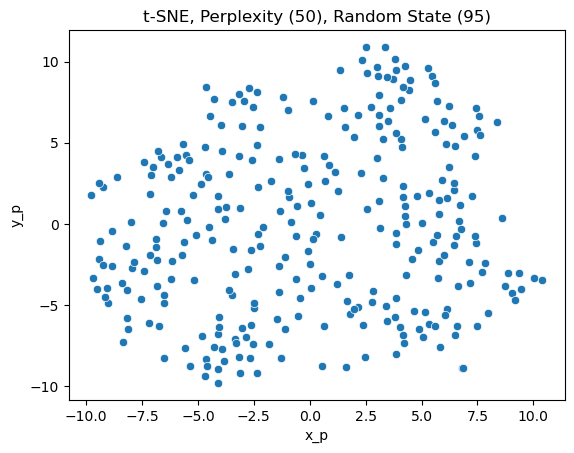

-\-\-\


In [29]:
for i in [5,15,25,35,45,50]:
    for k in [80, 95]:
        tsne = TSNE(n_components = 2, perplexity = i, random_state = k)
        datsne = tsne.fit_transform(data3)
        df_t = pd.DataFrame(datsne, columns = ['x_p', 'y_p'])
        df_c = pd.concat([data11, df_t], axis = 1)
        sns.scatterplot(x = 'x_p', y = 'y_p', data = df_c)
        plt.title('t-SNE, Perplexity (%s), Random State (%s)' %(i,k))
        plt.show()
    print('-\\-\\-\\')

#### 3.1.2. Interpretation

Use your t-SNE plots above to answer the following questions.

1. Is this dataset clusterable?

At some perplexity values, it is possible to observe a clustering structurd, for example with 15 or maybe 25. It is possible to observe this. This structure disappears when the perplexity increases

2. If so, how many clusters does the dataset have?

2 main clusters

3. If so, are the clusters spherical?

No

4. If so, are the clusters well-separated?

No

5. If you have identified some "main clusters" from these plots, is there strong evidence that some of these "main clusters" may be comprised of some "subclusters"?

If perplexity is equal to 15 there can be some subcluster structure. Still I would not say that there is strong evidence for this due to the effect of high perplexity values

#### 3.1.3. Corroborating

The purpose of this case study is to build intuition about how/why the t-SNE algorithm works the way that it does under different scenarios. Plot your original dataset3 data and confirm (or deny) which of your answers that you gave above were true or false. If an interpretation that you made from the t-SNE plot was wrong, explain why the t-SNE algorithm may not be as effective in interpreting the underlying clustering structure for this particular dataset.

<Axes: xlabel='x', ylabel='y'>

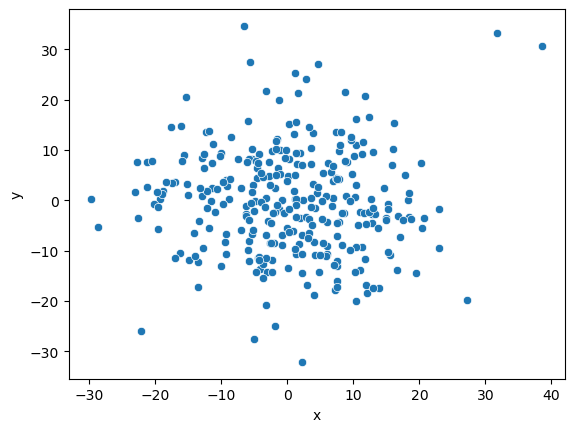

In [30]:
sns.scatterplot(x = 'x', y = 'y', data = data3)

The data is not clusterable. I mentioned that at perplexity of 15 or 25 a possible cluster structure is observed, but this is not correct. One explanation is the fact that there are some points that would benefit from this value and start clustering together, which can be misleading.



### 3.2. Partially Discretized Dataset

#### 3.2.1 t-SNE Plots

First, read the dataset3_integer_x.csv file into a dataframe. Then use 6 different perplexity values and at least two random states for each perplexity value two map this 2-d dataframe onto another two-dimensional dataset using the t-SNE algorithm. Show your projected coordinates in a scatterplot for each combination of random state and perplexity value.

In [31]:
data33 = pd.read_csv('dataset3_integer_x.csv')

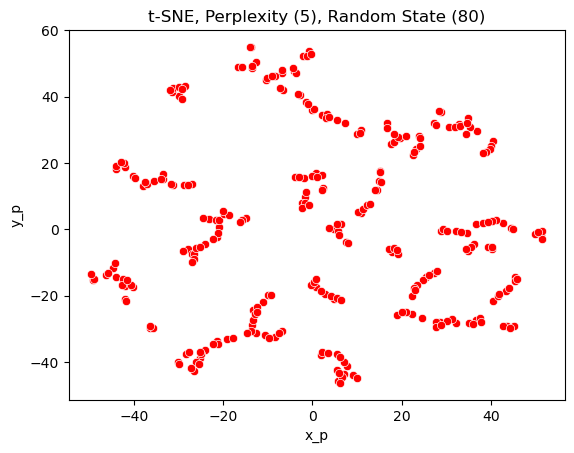

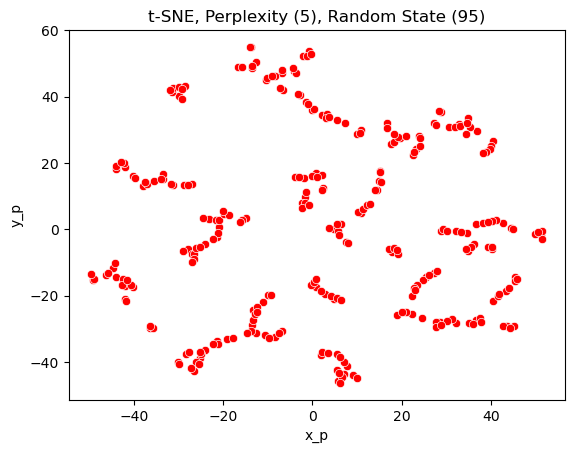

-\-\-\


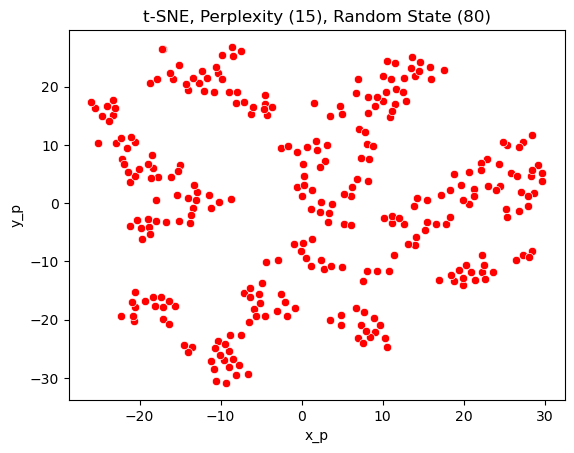

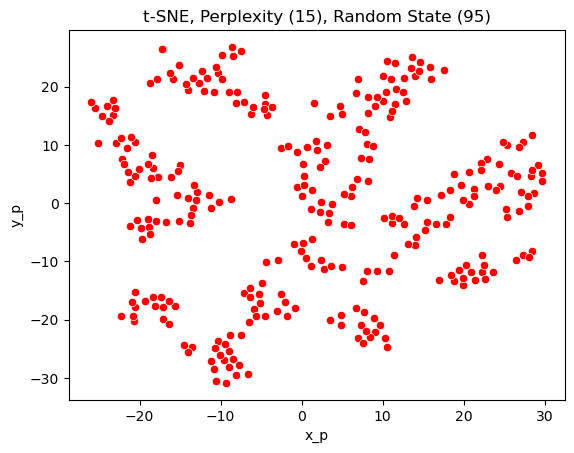

-\-\-\


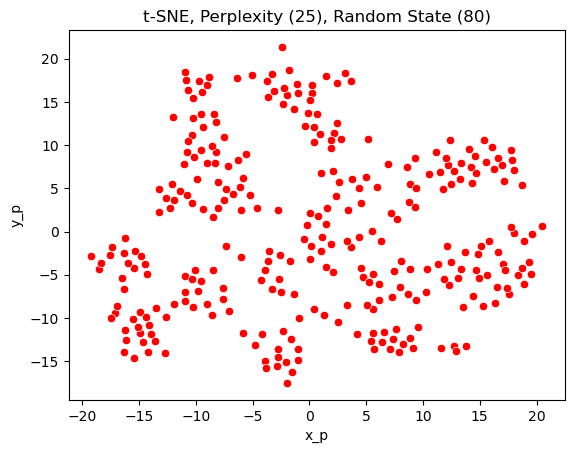

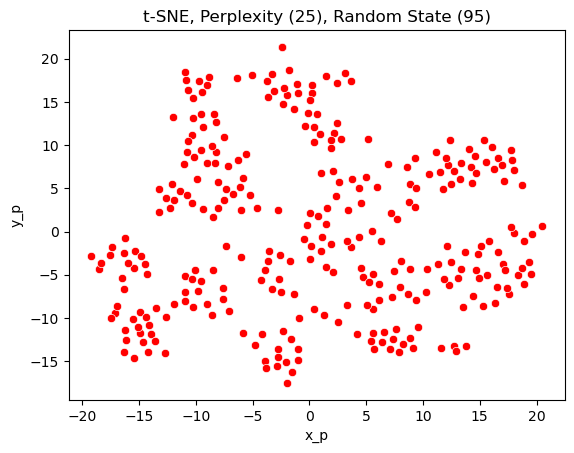

-\-\-\


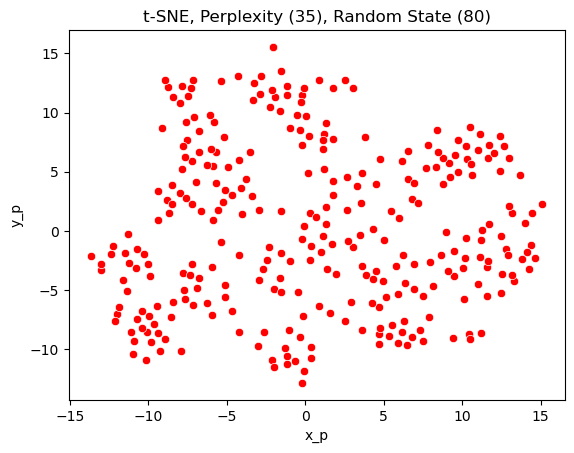

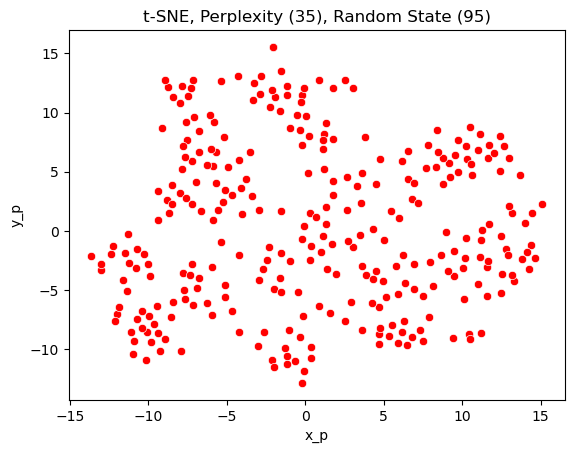

-\-\-\


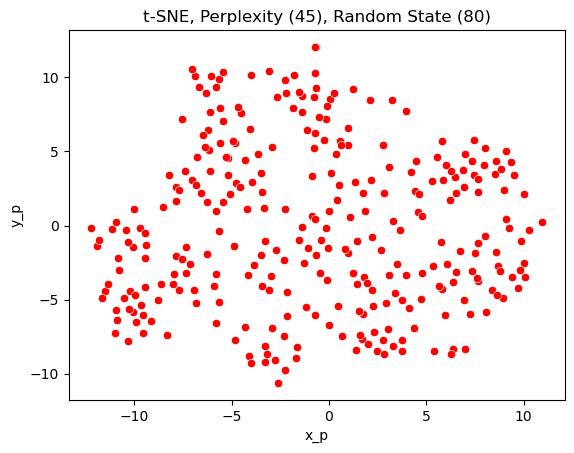

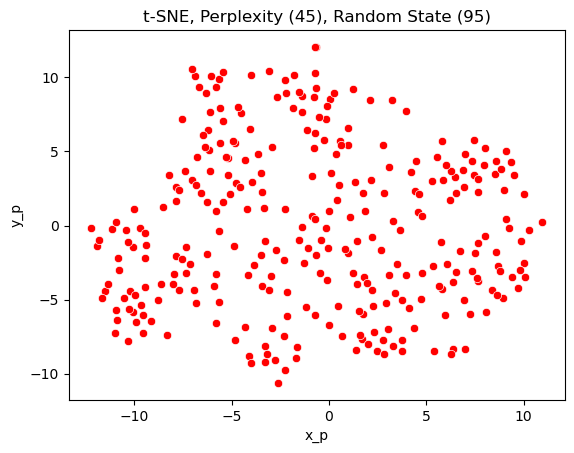

-\-\-\


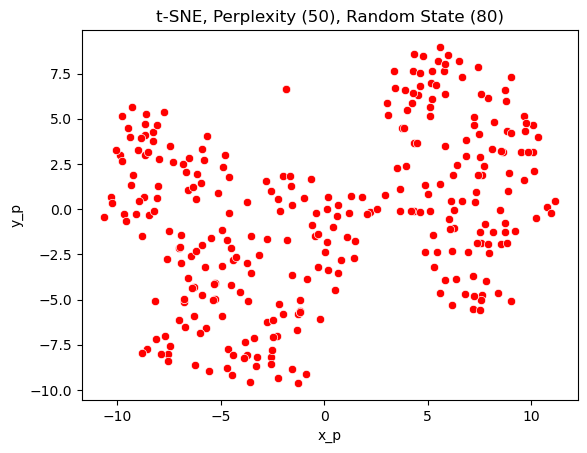

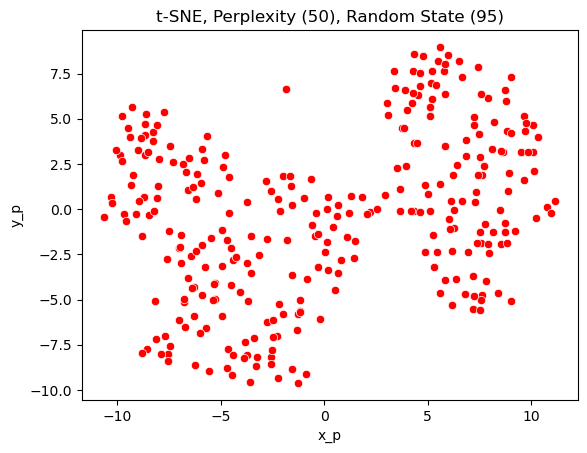

-\-\-\


In [32]:
for i in [5,15,25,35,45,50]:
    for k in [80, 95]:
        tsne = TSNE(n_components = 2, perplexity = i, random_state = k)
        datsne = tsne.fit_transform(data33)
        df_t = pd.DataFrame(datsne, columns = ['x_p', 'y_p'])
        df_c = pd.concat([data11, df_t], axis = 1)
        sns.scatterplot(x = 'x_p', y = 'y_p', data = df_c, color = 'red')
        plt.title('t-SNE, Perplexity (%s), Random State (%s)' %(i,k))
        plt.show()
    print('-\\-\\-\\')

#### 3.2.2. Interpretation

Use your t-SNE plots above to answer the following questions.

1. Is this dataset clusterable?

A possible clustering structure can be observed at high and low perplexity

2. If so, how many clusters does the dataset have?

Two main clusters

3. If so, are the clusters spherical?

Yes

4. If so, are the clusters well-separated?

No

5. If you have identified some "main clusters" from these plots, is there strong evidence that some of these "main clusters" may be comprised of some "subclusters"?

There's no evidence of subclusters.

#### 3.2.3. Different t-SNE Plots

Plot your original dataset3_integer_x.csv data. Were your interpretations of the t-SNE plots for the continuous dataset from 3.1 different from your interpretation of the t-SNE plots for the partially discretized dataset from 3.2? 
* If so, explain why you may have had different interpretation and/or seen different t-SNE plots.
* If not, explain why they may have been mostly the same.

<Axes: xlabel='x', ylabel='y'>

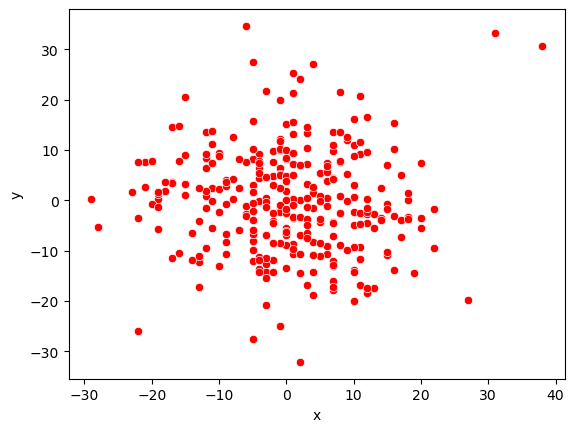

In [33]:
sns.scatterplot(x = 'x', y = 'y', data = data33, color = 'red')

Yes, the interpretation is different. The data structure is very similar in both cases, but in the discretized dataset multiple observations lie in the same discrete x axis which can give a sense of density that the algorithm is able to identify as a possible clustering structure at determined perplexity values given that the distance between observations will get reduced


## 4. Dataset 4



### 4.1. Continuous Dataset

#### 4.1.1 t-SNE Plots

First, read the dataset4.csv file into a dataframe. Then use 6 different perplexity values and at least two random states for each perplexity value two map this 2-d dataframe onto another two-dimensional dataset using the t-SNE algorithm. Show your projected coordinates in a scatterplot for each combination of random state and perplexity value.

In [34]:
data4 = pd.read_csv('dataset4.csv')

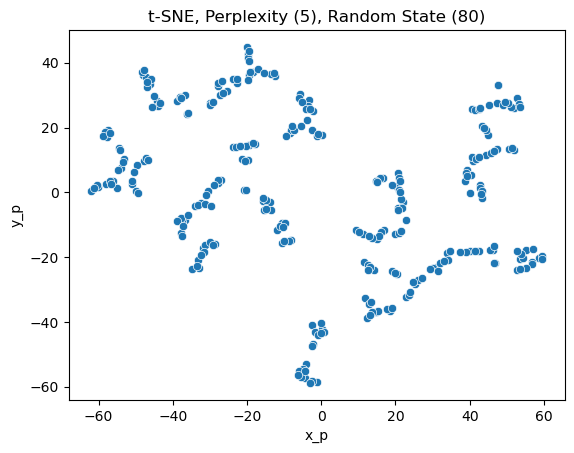

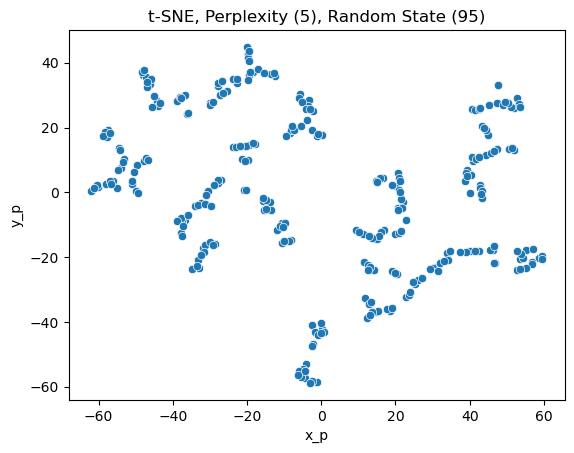

-\-\-\


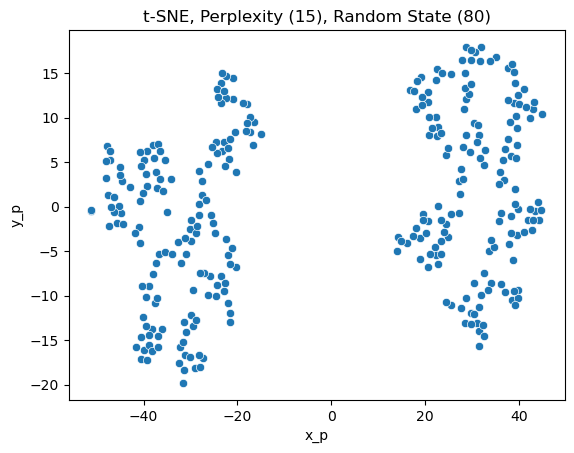

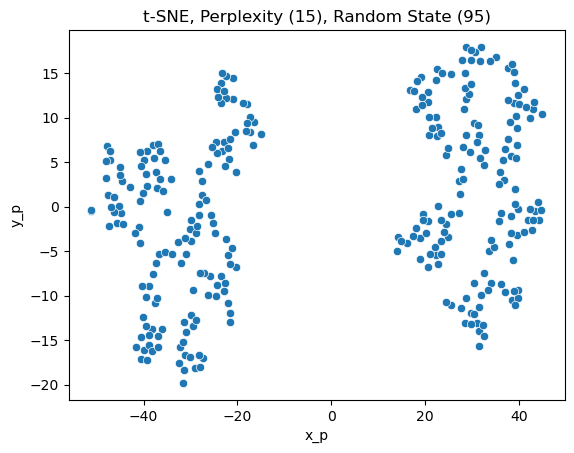

-\-\-\


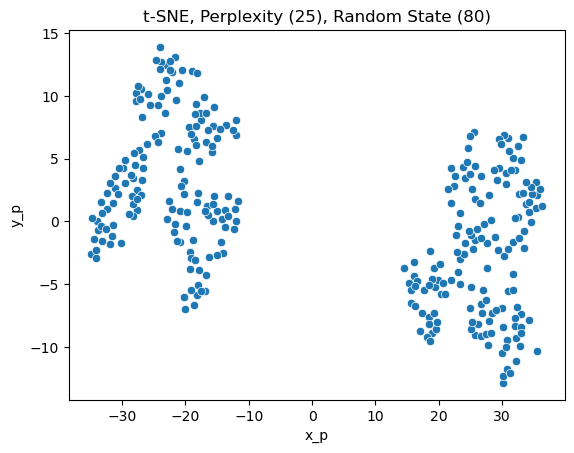

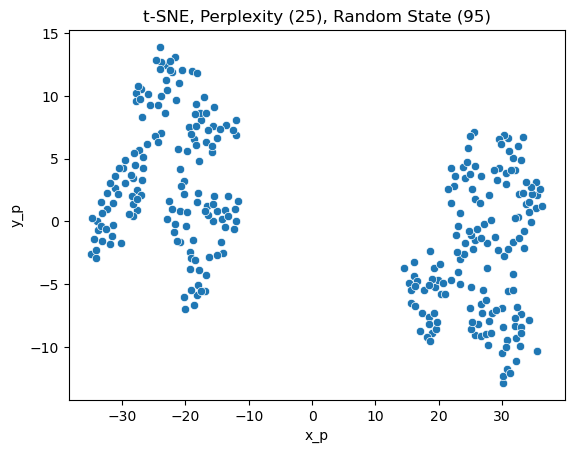

-\-\-\


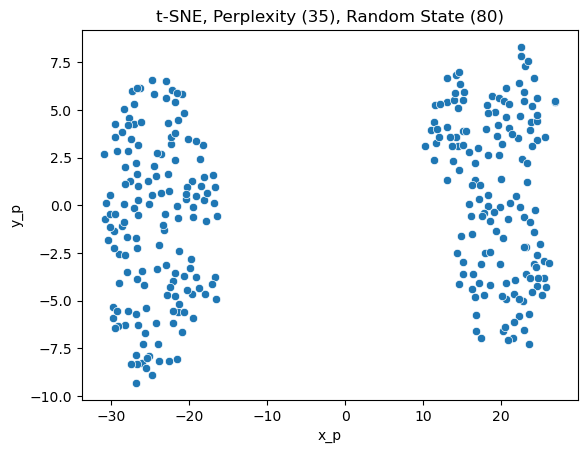

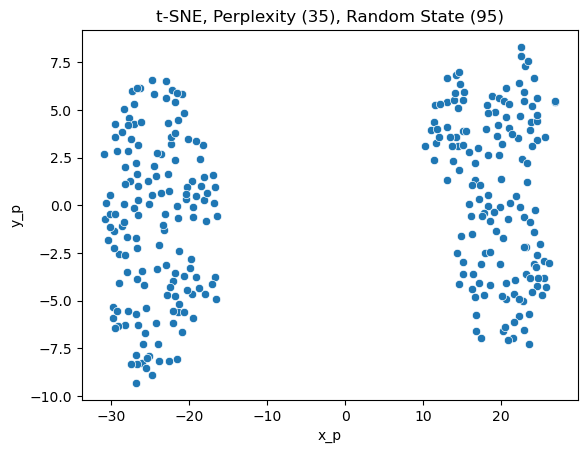

-\-\-\


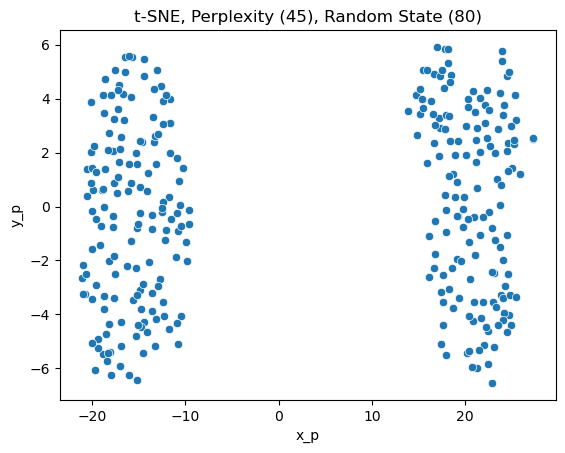

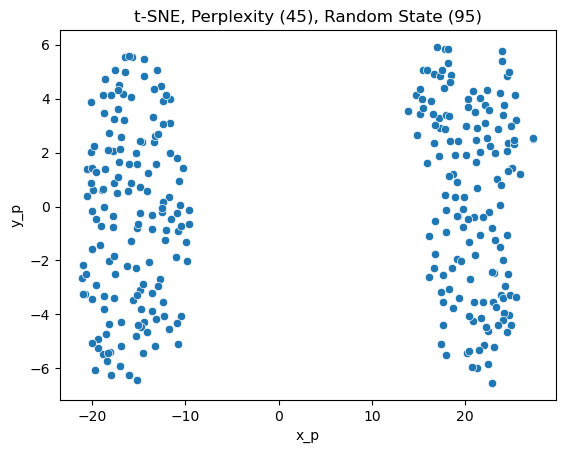

-\-\-\


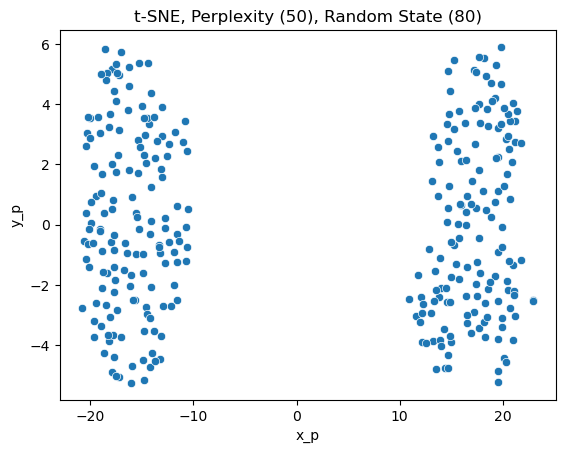

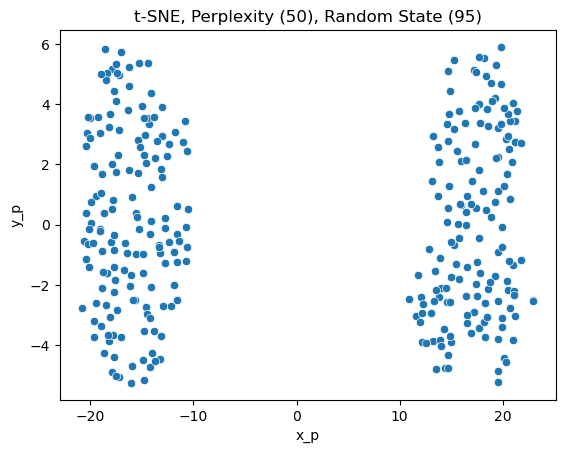

-\-\-\


In [35]:
for i in [5,15,25,35,45,50]:
    for k in [80, 95]:
        tsne = TSNE(n_components = 2, perplexity = i, random_state = k)
        datsne = tsne.fit_transform(data4)
        df_t = pd.DataFrame(datsne, columns = ['x_p', 'y_p'])
        df_c = pd.concat([data11, df_t], axis = 1)
        sns.scatterplot(x = 'x_p', y = 'y_p', data = df_c)
        plt.title('t-SNE, Perplexity (%s), Random State (%s)' %(i,k))
        plt.show()
    print('-\\-\\-\\')

#### 4.1.2. Interpretation

Use your t-SNE plots above to answer the following questions.

1. Is this dataset clusterable?

Yes

2. If so, how many clusters does the dataset have?

Two

3. If so, are the clusters spherical?

Yes

4. If so, are the clusters well-separated?

Yes


5. If you have identified some "main clusters" from these plots, is there strong evidence that some of these "main clusters" may be comprised of some "subclusters"?

No subcluster structure

#### 4.1.3. Corroborating

The purpose of this case study is to build intuition about how/why the t-SNE algorithm works the way that it does under different scenarios. Plot your original dataset4 data and confirm (or deny) which of your answers that you gave above were true or false. If an interpretation that you made from the t-SNE plot was wrong, explain why the t-SNE algorithm may not be as effective in interpreting the underlying clustering structure for this particular dataset.

<Axes: xlabel='x', ylabel='y'>

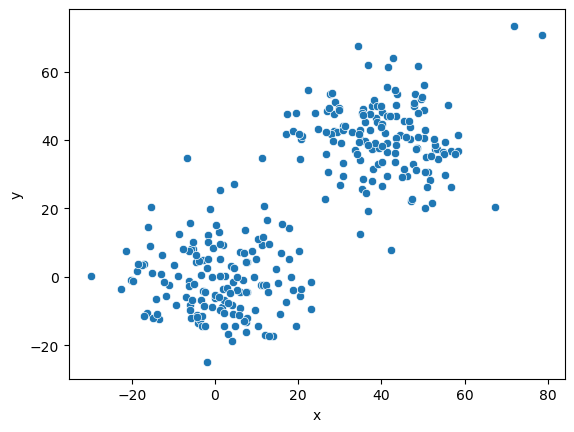

In [36]:
sns.scatterplot(x = 'x', y = 'y', data = data4)

Two clusters are easily observed in this case. So there's agreement with the previous interpretation.



### 4.2. Partially Discretized Dataset

#### 4.2.1 t-SNE Plots

First, read the dataset4_integer_x.csv file into a dataframe. Then use 6 different perplexity values and at least two random states for each perplexity value two map this 2-d dataframe onto another two-dimensional dataset using the t-SNE algorithm. Show your projected coordinates in a scatterplot for each combination of random state and perplexity value.

In [37]:
data44 = pd.read_csv('dataset4_integer_x.csv')

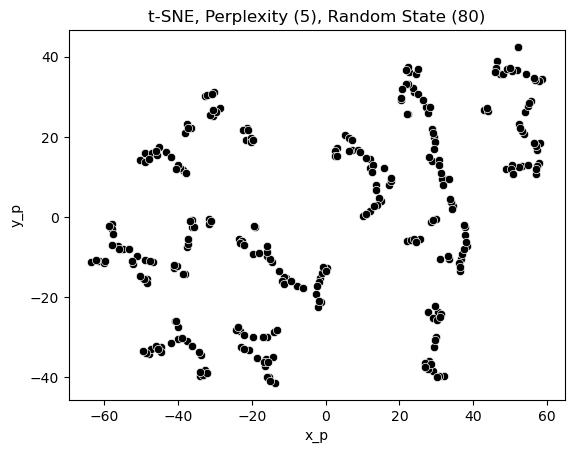

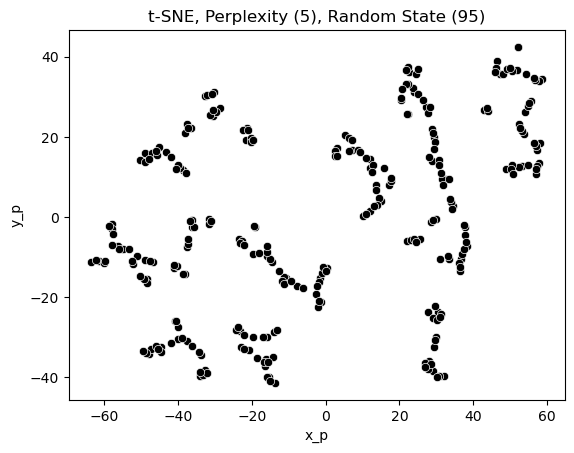

-\-\-\


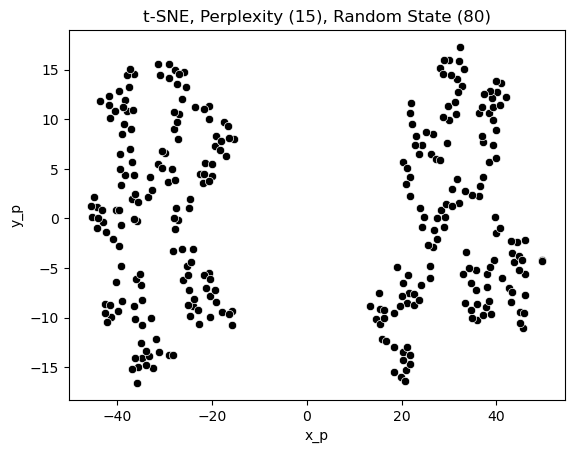

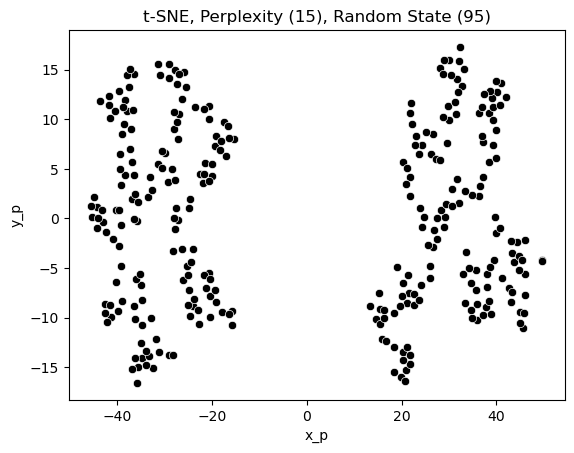

-\-\-\


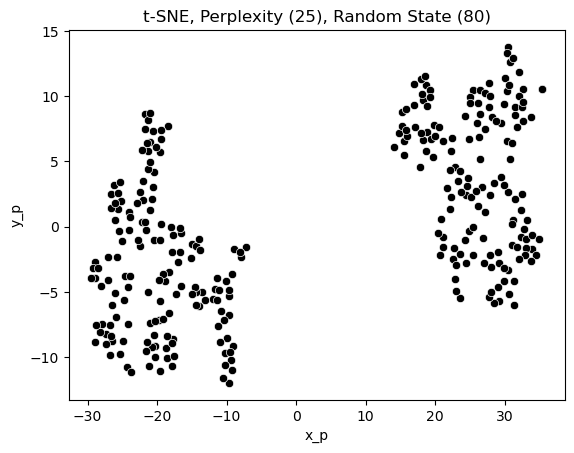

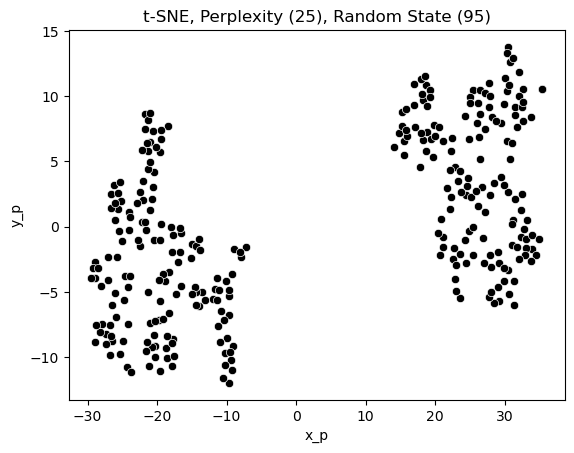

-\-\-\


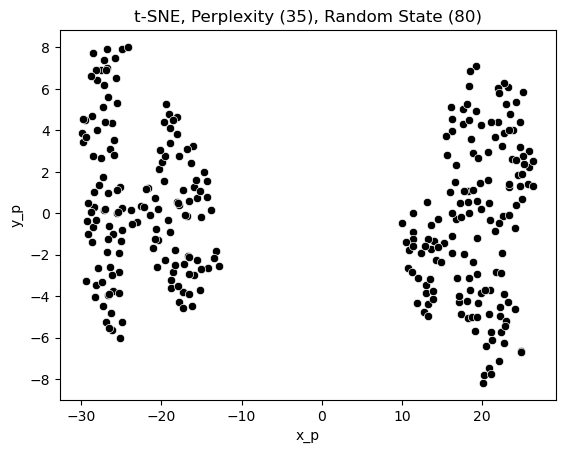

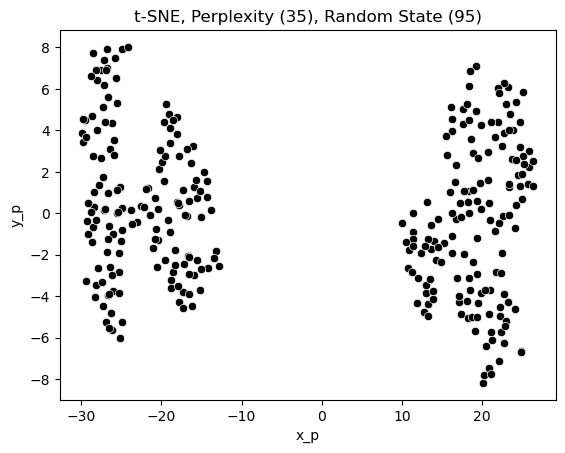

-\-\-\


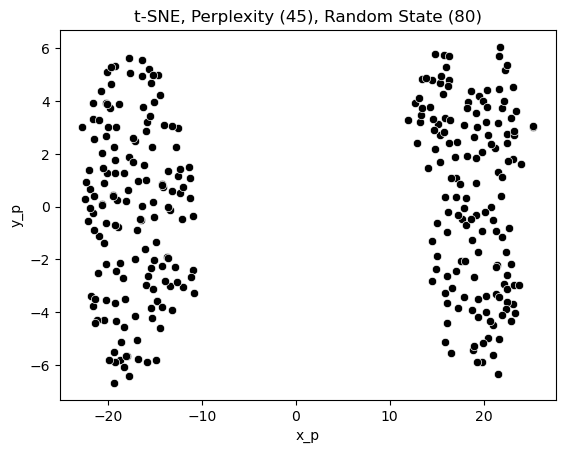

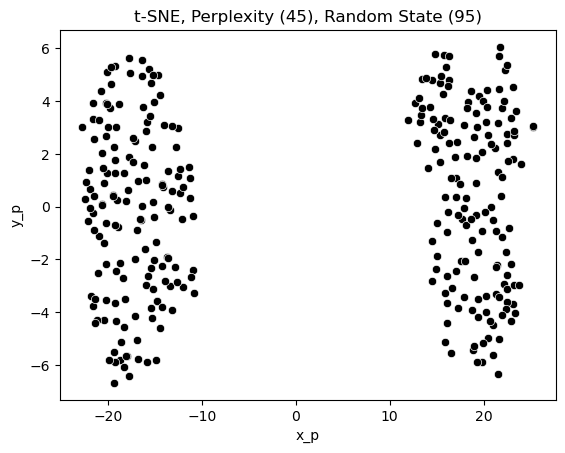

-\-\-\


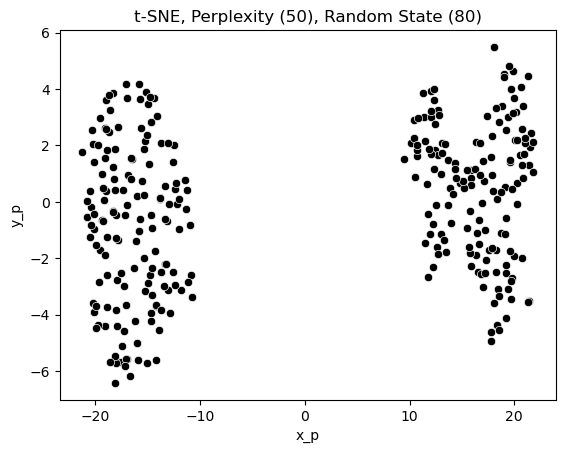

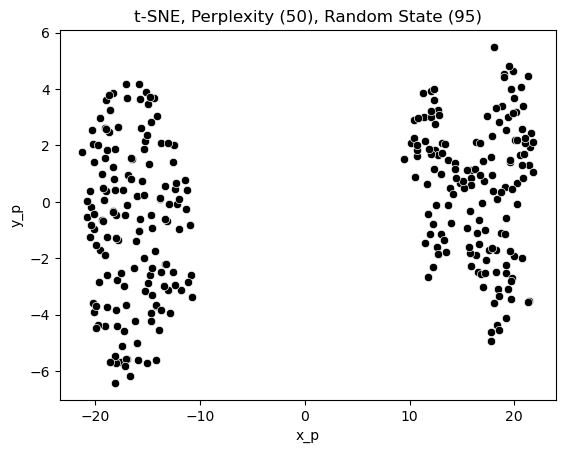

-\-\-\


In [38]:
for i in [5,15,25,35,45,50]:
    for k in [80, 95]:
        tsne = TSNE(n_components = 2, perplexity = i, random_state = k)
        datsne = tsne.fit_transform(data44)
        df_t = pd.DataFrame(datsne, columns = ['x_p', 'y_p'])
        df_c = pd.concat([data11, df_t], axis = 1)
        sns.scatterplot(x = 'x_p', y = 'y_p', data = df_c, color = 'black')
        plt.title('t-SNE, Perplexity (%s), Random State (%s)' %(i,k))
        plt.show()
    print('-\\-\\-\\')

#### 4.2.2. Interpretation

Use your t-SNE plots above to answer the following questions.

1. Is this dataset clusterable?

Yes

2. If so, how many clusters does the dataset have?

Two clusters

3. If so, are the clusters spherical?

Yes

4. If so, are the clusters well-separated?


Yes

5. If you have identified some "main clusters" from these plots, is there strong evidence that some of these "main clusters" may be comprised of some "subclusters"?

It is not possible to observe any subcluster

#### 4.2.3. Different t-SNE Plots

Plot your original dataset4_integer_x.csv data. Were you interpretations of the t-SNE plots for the continuous datast from 4.1 different from your interpretation of the t-SNE plots for the partially discretized dataset from 4.2? If so, explain why you may have had different interpretation and/or seen different t-SNE plots.

<Axes: xlabel='x', ylabel='y'>

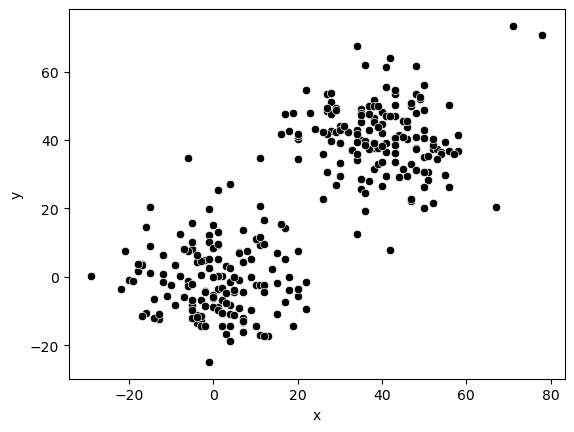

In [39]:
sns.scatterplot(x = 'x', y = 'y', data = data44, color = 'black')

The structure of this discretized data is very similar to the structure of the continuous data. The distribution of the observations is very similar and that's why the algorithm was able to identify the clustering structure. Therefore the interpretation was the same in both cases.